# 1. Exploratory Data Analysis

## 1.1. Understanding the Project

The primary objective of this project is to predict and identify users' private information, including their **ID number**, **gender**, and **age**. This is achieved through the analysis of two types of data: **head and hand motion data**, and **traffic data**.

Data collection involved conducting experiments with **100 participants** who engaged in gameplay across **two sets**: **Beat Saber and Cooking Simulator** for the first set, and **Medal of Honor and Forklift Simulator** for the second set. Each set consisted of a **slow game** and a **fast game**. For the first set, Beat Saber was the fast game, and Cooking Simulator was the slow one. For the second set, Forklift Simulator was the fast game, and Medal of Honor was the slow one. Each participant played each game for multiple sessions, with a minimum of **10 minutes** per session. Participants could choose to start with either the fast or slow game based on their experience with the VR headset. The participants were divided into **two groups**, with each group situated in a separate room with similar conditions. The VR headset used for the experiments was the **Oculus Quest 2**.

Throughout the experiments, participants experienced diverse types of movements, such as **walking** and **joystick interactions**, depending on the nature of the selected game. Simultaneously, traffic data was recorded by connecting the VR headset to a capable device capable of capturing the traffic data while participants engaged in gameplay.

Among the initially planned **100 participants**, we opted to analyze the data from only **60 participants**. This decision was prompted by technical challenges and disruptions experienced by the remaining participants. Some individuals encountered technical issues during the experiments, while others had to discontinue their participation due to VR sickness. As a result, the dataset was narrowed down to the data collected from the 60 participants who completed the experiments successfully.


## 1.2. Understanding the Games
In this project, we selected four well-known VR games—**Beat Saber**, **Cooking Simulator**, **Medal of Honor: Above and Beyond**, and **Forklift Simulator**—each of which captures distinct movement patterns. These games provide diverse scenarios that can highlight different physical interactions and user movements in a VR environment.

| **Game**                   | **Primary Movements/Interactions**                                                                 | **Player Position**         | **Activity Type**                           | **Interaction Complexity**    |
|----------------------------|---------------------------------------------------------------------------------------------------|-----------------------------|---------------------------------------------|-------------------------------|
| **Beat Saber**              | - Hand swings to slash cubes <br> - Dodging obstacles by crouching or leaning                      | Standing                     | Rhythm-based, fast-paced movements         | High (due to speed and accuracy) |
| **Cooking Simulator**       | - Grabbing, cutting, mixing ingredients <br> - Controlling kitchen appliances (oven, blender, etc.) | Standing                     | Simulated real-world cooking tasks         | Moderate (precision in cooking actions) |
| **Medal of Honor: Above and Beyond** | - Running, crouching, shooting <br> - Climbing and physical interaction with objects              | Standing, Crouching, Leaning | First-person shooter, tactical movement    | High (requires reflexes and tactical actions) |
| **Forklift Simulator**      | - Steering forklift <br> - Lifting, moving, and placing cargo                                    | Seated                       | Industrial vehicle control, precision tasks | Low (requires controlled, deliberate movement) |


### 1.2.1. Beat Saber
<img src="https://www.donanimhaber.com/images/images/haber/116345/src/facebook-sanal-gerceklik-sirketi-beat-games-i-satin-aldi116345_0.jpg" alt="Beat Saber Image">
_Image source_: [DonanimHaber](https://www.donanimhaber.com/facebook-sanal-gerceklik-sirketi-beat-games-i-satin-aldi--116345)

Beat Saber is a popular Virtual Reality rhythm game where players must slice incoming cubes to the beat of the music using lightsabers. The game provides an engaging experience as players wield a blue saber in one hand and a red saber in the other, slicing cubes according to the direction indicated by arrows on the cubes [1]. Along with slashing, players must avoid oncoming obstacles, requiring quick body movements to dodge.

The game rewards players for precision and rhythm, with a scoring system based on the accuracy of their slashes. As the game progresses, it becomes more challenging, with faster cubes and complex patterns. Players can choose from various difficulty levels, making it accessible to both beginners and advanced players alike [2].

**Sources**:  
[1] https://www.meta.com/en-gb/experiences/2448060205267927/  
[2] https://www.windowscentral.com/beat-saber-everything-we-know-about-vr-rhythm-game

### 1.2.2. Cooking Simulator
<img src="https://wallpapercave.com/wp/wp8447439.jpg" alt="Cooking Simulator Image">
_Image source_: [Wallpapercave](https://wallpapercave.com/cooking-simulator-wallpapers)

Cooking Simulator is a VR game that simulates the experience of cooking in a highly interactive kitchen environment. Players prepare dishes by cutting, mixing, frying, and baking ingredients, all while managing time and following recipes. The game encourages creativity while requiring attention to detail, as accurate cooking techniques lead to better results.

The game's interaction mechanics, including grabbing utensils, slicing vegetables, and controlling kitchen appliances, closely mirror real-life actions. This combination of precise hand movements and object manipulation offers valuable data on user interactions within the VR environment.

### 1.2.3. Medal of Honor: Above and Beyond
<img src="https://cdn.wccftech.com/wp-content/uploads/2020/12/Medal-of-Honor-Above-and-Beyond-Review-01-Header.jpg" alt="Medal of Honor Image">
_Image source_: [Wccftech](https://wccftech.com/review/medal-of-honor-above-and-beyond-vr-heart/)

Medal of Honor: Above and Beyond is an immersive World War II VR game designed specifically for Oculus devices. Players assume the role of an Allied agent from the Office of Strategic Services (OSS), tasked with various missions to thwart Nazi operations [1].

This game involves diverse movement mechanics, such as locomotion, crouching, climbing, and shooting, which offer unique opportunities to capture complex VR user interactions. Players engage in combat scenarios, requiring fast reflexes, tactical movement, and precise aiming, all contributing to a rich dataset for analyzing user behavior and movement [1].

**Source**:  
[1] https://www.windowscentral.com/medal-honor-above-and-beyond

### 1.2.4. Forklift Simulator
<img src="https://fs-prod-cdn.nintendo-europe.com/media/images/10_share_images/games_15/nintendo_switch_download_software_1/2x1_NSwitchDS_ForkliftSimulator2023.jpg" alt="Forklift Simulator Image">
_Image source_: [Nintendo](https://www.nintendo.it/Giochi/Giochi-scaricabili-per-Nintendo-Switch/Forklift-Simulator-2023-2435161.html)

Forklift Simulator places players in the role of a forklift operator, navigating industrial environments while picking up and moving cargo with precision. Unlike the previous action-packed games, Forklift Simulator emphasizes control, accuracy, and patience, simulating real-world forklift operations in VR.

This game offers a unique perspective by requiring seated, careful movement rather than high-energy actions, providing contrasting movement patterns compared to the other selected games. The focus on smooth, controlled actions makes it useful for analyzing how users interact with VR in less physically demanding scenarios.


## 1.3. Understanding the Data
The data is organized as follow : 
```python
├── raw
    ├── Intitial survey          <- General information (age, gender and previous experience) for every participant.
    │
    ├── Time Score Sheet         <- The score sheet for every participant.
    │
    ├── Frames                   <- It contains Four files for every game of each participant
    │   │
    │   ├── group1_order1_user0_fast_traffic_fill.csv       <- Contains the frames extracted from the corresponding 
    │   │                                                      raw traffic data for the fast game
    │   │                                                      filled with zeros when missing frames were detected.
    │   ├── group1_order1_user0_fast_traffic.csv            <- Contains the frames extracted from the corresponding 
    │   │                                                      raw traffic data for the fast game;
    │   │
    │   ├── group1_order1_user0_slow_traffic_fill.csv       <- Contains the frames extracted from the corresponding 
    │   │                                                      raw traffic data for the slow game 
    │   │                                                      filled with zeros when missing frames were detected.
    │   └── group1_order1_user0_slow_traffic.csv            <- Contains the frames extracted from the corresponding 
    │                                                           raw traffic data for the slow game;
    │
    ├── Raw Traffic and Movement Data       <- It contains a subfolder for every participant 
    │   │                                      (in the format groupX_orderY_userZ), and every subfolder contains:
    │   │                                       
    │   │                                              
    │   ├── group1_order1_user0                                  
    │   │
    │   │   ├── group1_order1_user0_fast_movement.csv       <- The movement data for the "fast" game
    │   │   │
    │   │   ├── group1_order1_user0_fast_traffic.csv        <- The raw traffic data for the "fast" game
    │   │   │
    │   │   ├── group1_order1_user0_slow_movement.csv       <- The movement data for the "slow" game
    │   │   │
    │   │   └── group1_order1_user0_slow_traffic.csv        <- The raw traffic data for the "slow" game
```

<style>
    table {
        width: 100%;
    }
</style>
### 1.3.1. Initial survery

| Variable | Description |
| -------- | ----------- |
| ID | User Identifier, formatted as "groupX_orderY_userZ" | |
| Age | User's Age |
| Previous VR Experience (1-5) | Ordinal variable ranging from 1 to 5, where 1 indicates minimal VR experience and 5 indicates extensive VR experience |
| Previous General Gaming Experience (1-5) | Ordinal variable ranging from 1 to 5, where 1 signifies minimal general gaming experience and 5 denotes extensive general gaming experience |

<style>
    table {
        width: 100%;
    }
</style>
### 1.3.2. Frame Data

| Variable | Description |
| -------- | ----------- |
| time | Time elapsed in seconds, starting from 0 when the user begins playing|
| size | The size of each data packet (bytes)            |
| pkts | The total number of data packets transmitteds       |

### 1.3.3. Movement Data
<img src="../references/Quest Controller Diagram.png">

**Sensor 0 and Sensor 1**: These are often the sensors located on the VR headset itself. They track the position and orientation (pitch, yaw, roll) of the user's head. This tracking allows the VR system to render the virtual environment from the correct perspective, changing in real-time as the user moves their head.

**Sensor 2 and Sensor 3**: These could refer to the sensors on the VR controllers (one for each hand). These sensors track the position and orientation of the user's hands, translating physical movements into virtual actions, such as grabbing, pointing, or gesturing.

| Variable | Description |
| -------- | ----------- |
| Time | Timer in seconds, starting from 0 when the user begins the session |
| Remote Buttons | Refers to buttons on an additional remote device; always 0 and can be ignored |
| Touch Buttons | Corresponds to buttons on the controllers; each button is assigned a unique number, and pressing a button records its number in the CSV file. Simultaneous presses record the sum of these numbers. Button values: A: 1, B: 2, Right Thumb: 4, X: 256, Y: 512, Left Thumb: 1024, Menu: 1048576 |
| Touch Touches |it's capacitive sensors on the buttons and thumbsticks. These sensors can detect when a finger is lightly touching the surface, even if the button isn't being physically pressed down. This feature is used to enhance immersion and interaction in VR. By detecting the mere presence of fingers on the controller, VR systems can mimic more natural hand and finger movements in the virtual environment. For example, if your fingers are resting on the trigger or buttons, your virtual hand might show a corresponding grip or readiness to interact.|
| Left Index Trigger | Measures pressure on the left index trigger, ranging from 0 (no pressure) to 1 (full pressure) |
| Right Index Trigger | Measures pressure on the right index trigger, ranging from 0 to 1 |
| Left Hand Trigger | Measures pressure on the left hand trigger, ranging from 0 to 1 |
| Right Hand Trigger | Measures pressure on the right hand trigger, ranging from 0 to 1 |
| Left Touch PosX | X-axis position of the left controller |
| Left Touch PosY | Y-axis position of the left controller |
| Left Touch PosZ | Z-axis position of the left controller |
| Left Touch OrientationW | W component of the left controller's orientation quaternion |
| Left Touch OrientationX | X component of the left controller's orientation quaternion |
| Left Touch OrientationY | Y component of the left controller's orientation quaternion |
| Left Touch OrientationZ | Z component of the left controller's orientation quaternion |
| Right Touch PosX | X-axis position of the right controller |
| Right Touch PosY | Y-axis position of the right controller |
| Right Touch PosZ | Z-axis position of the right controller |
| Right Touch OrientationW | W component of the right controller's orientation quaternion |
| Right Touch OrientationX | X component of the right controller's orientation quaternion |
| Right Touch OrientationY | Y component of the right controller's orientation quaternion |
| Right Touch OrientationZ | Z component of the right controller's orientation quaternion |
| Head PosX | X-axis position of the headset |
| Head PosY | Y-axis position of the headset |
| Head PosZ | Z-axis position of the headset |
| Head OrientationW | W component of the headset's orientation quaternion |
| Head OrientationX | X component of the headset's orientation quaternion |
| Head OrientationY | Y component of the headset's orientation quaternion |
| Head OrientationZ | Z component of the headset's orientation quaternion |
| Sensor 0 PosX | X-axis position of Sensor 0 |
| Sensor 0 PosY | Y-axis position of Sensor 0 |
| Sensor 0 PosZ | Z-axis position of Sensor 0 |
| Sensor 0 OrientationW | W component of Sensor 0's orientation quaternion |
| Sensor 0 OrientationX | X component of Sensor 0's orientation quaternion |
| Sensor 0 OrientationY | Y component of Sensor 0's orientation quaternion |
| Sensor 0 OrientationZ | Z component of Sensor 0's orientation quaternion |
| Sensor 1 PosX | X-axis position of Sensor 1 |
| Sensor 1 PosY | Y-axis position of Sensor 1 |
| Sensor 1 PosZ | Z-axis position of Sensor 1 |
| Sensor 1 OrientationW | W component of Sensor 1's orientation quaternion |
| Sensor 1 OrientationX | X component of Sensor 1's orientation quaternion |
| Sensor 1 OrientationY | Y component of Sensor 1's orientation quaternion |
| Sensor 1 OrientationZ | Z component of Sensor 1's orientation quaternion |
| Sensor 2 PosX | X-axis position of Sensor 2 |
| Sensor 2 PosY | Y-axis position of Sensor 2 |
| Sensor 2 PosZ | Z-axis position of Sensor 2 |
| Sensor 2 OrientationW | W component of Sensor 2's orientation quaternion |
| Sensor 2 OrientationX | X component of Sensor 2's orientation quaternion |
| Sensor 2 OrientationY | Y component of Sensor 2's orientation quaternion |
| Sensor 2 OrientationZ | Z component of Sensor 2's orientation quaternion |
| Sensor 3 PosX | X-axis position of Sensor 3 |
| Sensor 3 PosY | Y-axis position of Sensor 3 |
| Sensor 3 PosZ | Z-axis position of Sensor 3 |
| Sensor 3 OrientationW | W component of Sensor 3's orientation quaternion |
| Sensor 3 OrientationX | X component of Sensor 3's orientation quaternion |
| Sensor 3 OrientationY | Y component of Sensor 3's orientation quaternion |
| Sensor 3 OrientationZ | Z component of Sensor 3's orientation quaternion |


<style>
    table {
        width: 100%;
    }
</style>
### 1.3.4. Traffic Data

| Variable | Description |
| -------- | ----------- |
| time | Time elapsed in seconds, starting from 0 when the user begins playing|
| size | The size of each data packet (bytes). It indicates how much data was sent or received in a single network traffic event.           |
| direction | This indicates the direction of the traffic. "DL" stands for "Download," meaning data coming into the headset from the network. "UL" stands for "Upload," indicating data being sent from the headset to the network.        |

## 1.4. Univariate Descriptive Statistics

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import matplotlib
matplotlib.style.use('fivethirtyeight') 
plt.rcParams.update({'font.size': 25})  

In [3]:
# Store all the files paths related to the participants data
all_files = []
data_path = '../data/raw/Raw_traffic_and_movement_data/'
for path, subdirs, files in os.walk(data_path):
    for name in files:
        all_files.append(path + '/' + name)

# Separating traffic data and movement data paths 
traffic_data = [x  for x in all_files if '_traffic.csv' in x]
movement_data = [x  for x in all_files if '_movement.csv' in x]

In [4]:
# Assign Numeric ID to participants 
participants = next(os.walk(data_path))[1]
participant_dict = {participant: idx + 1 for idx, participant in enumerate(participants)}
print(participant_dict)

{'group1_order1_user0': 1, 'group1_order1_user1': 2, 'group1_order1_user10': 3, 'group1_order1_user11': 4, 'group1_order1_user12': 5, 'group1_order1_user13': 6, 'group1_order1_user14': 7, 'group1_order1_user2': 8, 'group1_order1_user3': 9, 'group1_order1_user4': 10, 'group1_order1_user5': 11, 'group1_order1_user6': 12, 'group1_order1_user7': 13, 'group1_order1_user8': 14, 'group1_order1_user9': 15, 'group1_order2_user0': 16, 'group1_order2_user1': 17, 'group1_order2_user10': 18, 'group1_order2_user11': 19, 'group1_order2_user12': 20, 'group1_order2_user13': 21, 'group1_order2_user14': 22, 'group1_order2_user2': 23, 'group1_order2_user3': 24, 'group1_order2_user4': 25, 'group1_order2_user5': 26, 'group1_order2_user6': 27, 'group1_order2_user7': 28, 'group1_order2_user8': 29, 'group1_order2_user9': 30, 'group2_order1_user0': 31, 'group2_order1_user1': 32, 'group2_order1_user10': 33, 'group2_order1_user11': 34, 'group2_order1_user12': 35, 'group2_order1_user13': 36, 'group2_order1_user14'

### 1.2.1. Initial Survery Data

In [5]:
is_df = pd.read_csv('../data/raw/Initial survey.csv', sep=';')

Text(0.5, 1.0, 'Age Distribution by Age Group')

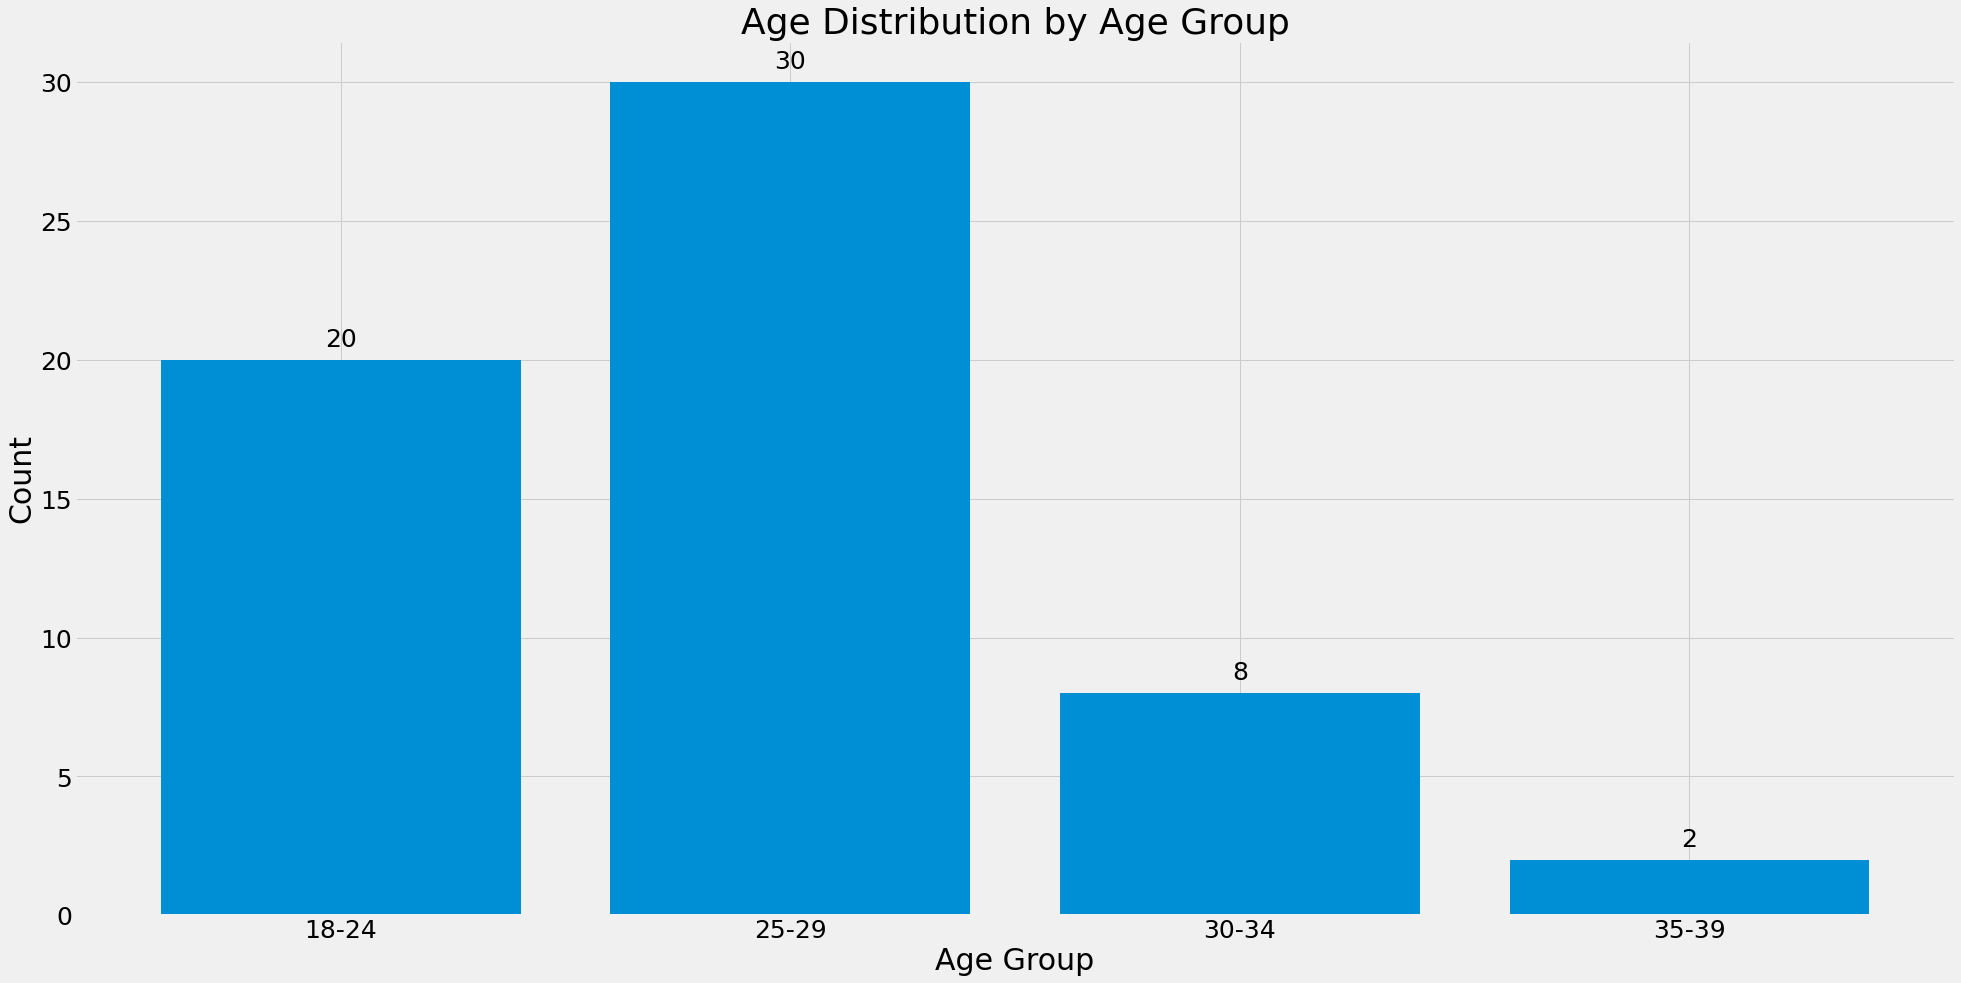

In [6]:
# Define the age groups
group_18_24 = is_df[(is_df['Age'] >= 18) & (is_df['Age'] <= 24)]
group_25_29 = is_df[(is_df['Age'] >= 25) & (is_df['Age'] <= 29)]
group_30_34 = is_df[(is_df['Age'] >= 30) & (is_df['Age'] <= 34)]
group_35_39 = is_df[(is_df['Age'] >= 35) & (is_df['Age'] <= 39)]

plt.figure(figsize=(30, 15))
age_groups = ['18-24', '25-29', '30-34', '35-39']
counts = [group_18_24['Age'].count(), group_25_29['Age'].count(), group_30_34['Age'].count(), group_35_39['Age'].count()]

plt.bar(age_groups, counts)

# Add the data value on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center') 

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution by Age Group')

The majority of the participants in the VR experiments are young adults, aged between 17 and 30, constituting 50 out of the total 60 participants. In contrast, participation from middle-aged adults (aged 31-40) is relatively low, with only 10 individuals falling into this age group.

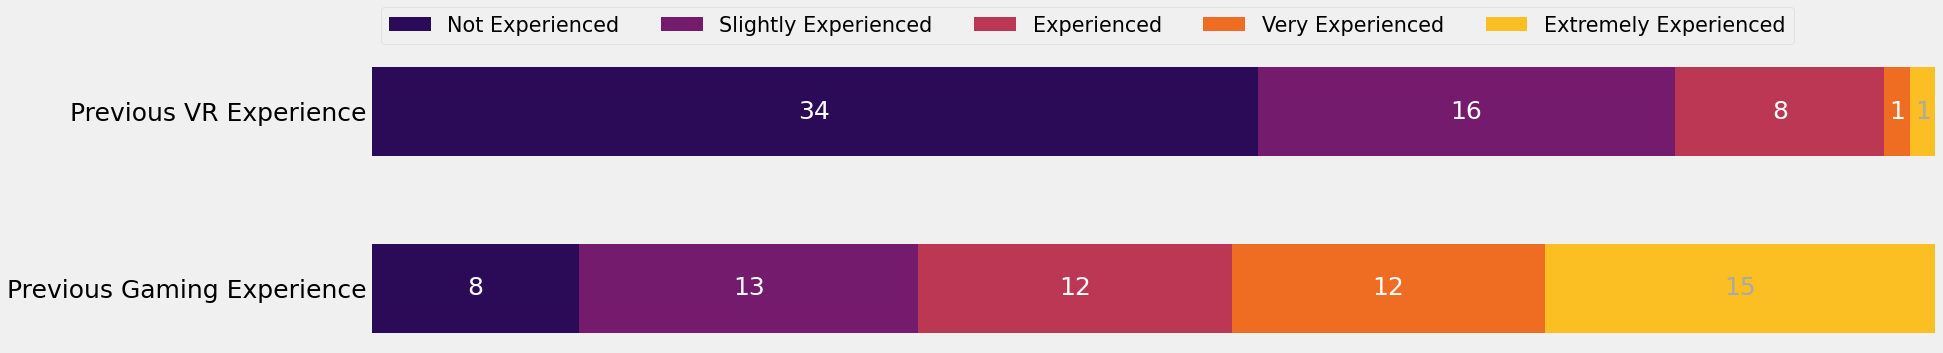

In [6]:
# Define the descriptive category names
category_names = ['Not Experienced', 'Slightly Experienced', 'Experienced', 'Very Experienced', 'Extremely Experienced']

vr_experience_counts = is_df['Previous VR experience (1-5)'].value_counts().sort_index()
gaming_experience_counts = is_df['Previous general gaming experience (1-5)'].value_counts().sort_index()

categories = np.arange(1, 6)  
vr_experience = np.array([vr_experience_counts.get(i, 0) for i in categories])
gaming_experience = np.array([gaming_experience_counts.get(i, 0) for i in categories])

labels = ['Previous VR Experience', 'Previous Gaming Experience']
data = np.vstack([vr_experience, gaming_experience])
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('inferno')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(25, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.max(np.sum(data, axis=1)))

for i in range(data.shape[1]):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, color=category_colors[i])
    xcenters = starts + widths / 2

    for y, (x, c) in enumerate(zip(xcenters, widths)):
        text_color = 'white' if np.mean(category_colors[i][:3]) < 0.5 else 'darkgrey'
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)

ax.legend(category_names, ncol=5, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

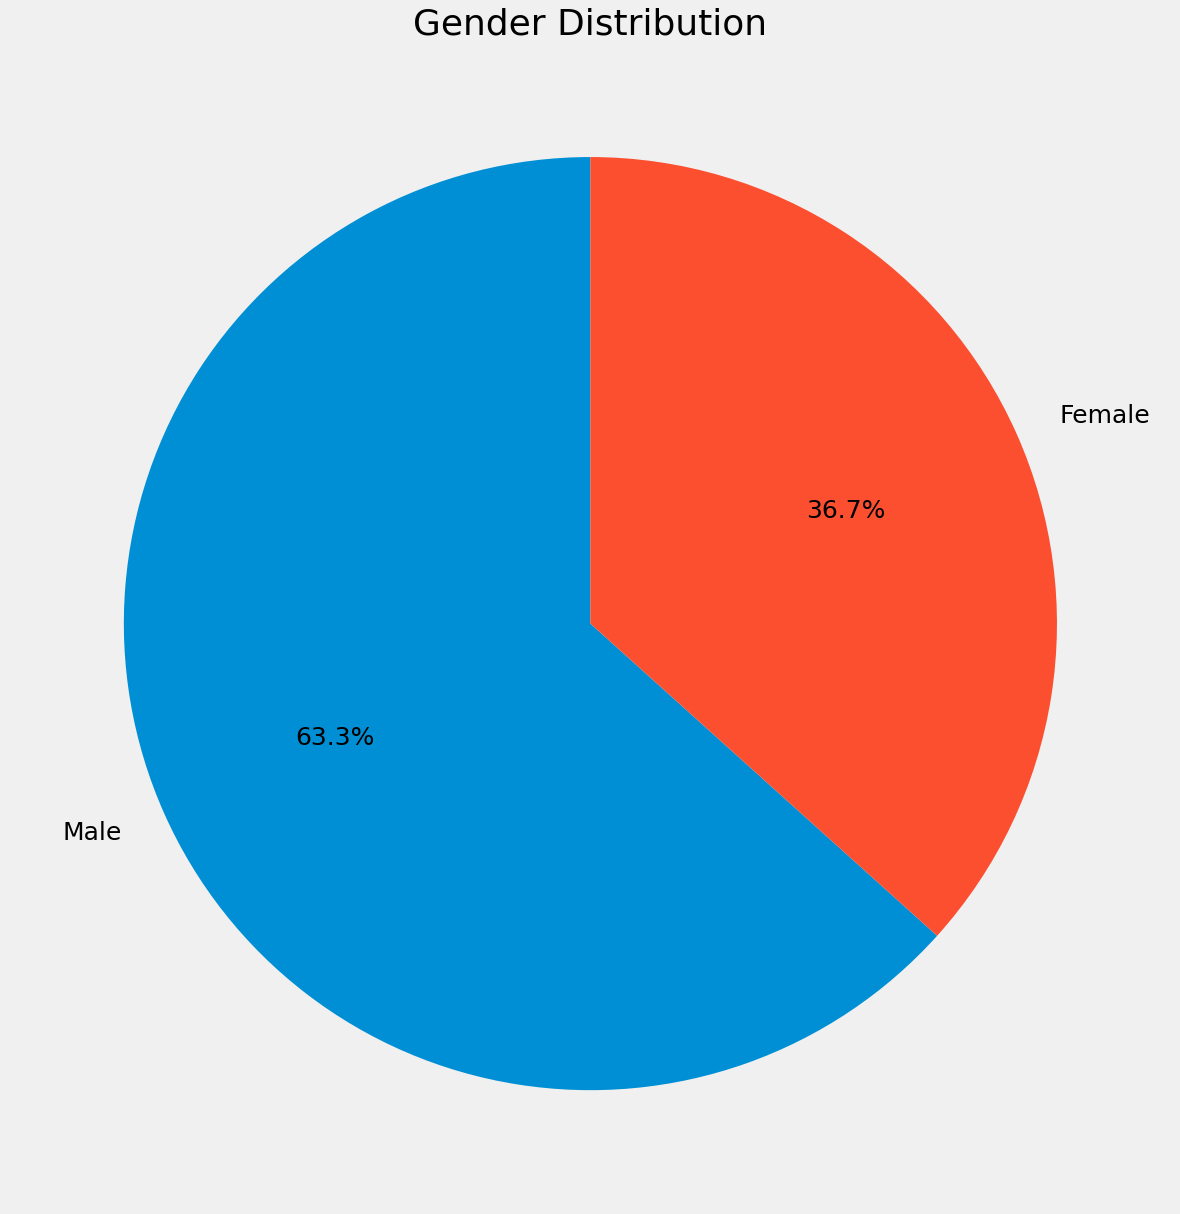

In [7]:
# Filtering by 'Gender' column
male_count = is_df[is_df['Gender'] == "Male"].shape[0] 
female_count = is_df[is_df['Gender'] == "Female"].shape[0] 

# Data for plotting
labels = ['Male', 'Female']
counts = [male_count, female_count]

# Creating the pie chart
plt.figure(figsize=(40, 40)) 
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Gender Distribution')
plt.show()


### 1.2.3. Movement Data

In [9]:
session = {}
for i in movement_data:
    df = pd.read_csv(i)
    idx = i.split('/')
    game = 'fast' if 'fast' in idx[-1] else 'slow'
    session['Participant_' + str(participant_dict[idx[4]]) + '_'+game  ] = df['time'].max()

In [10]:
participant_mov_fast = pd.read_csv("../data/raw/Raw_traffic_and_movement_data/group1_order1_user7/group1_order1_user7_fast_movement.csv")
participant_mov_slow = pd.read_csv("../data/raw/Raw_traffic_and_movement_data/group1_order1_user7/group1_order1_user7_slow_movement.csv")

#### 1.2.3.1. Features Over Time (Participant)

C:\Users\salim\AppData\Local\Temp\ipykernel_3536\1825490937.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 5))


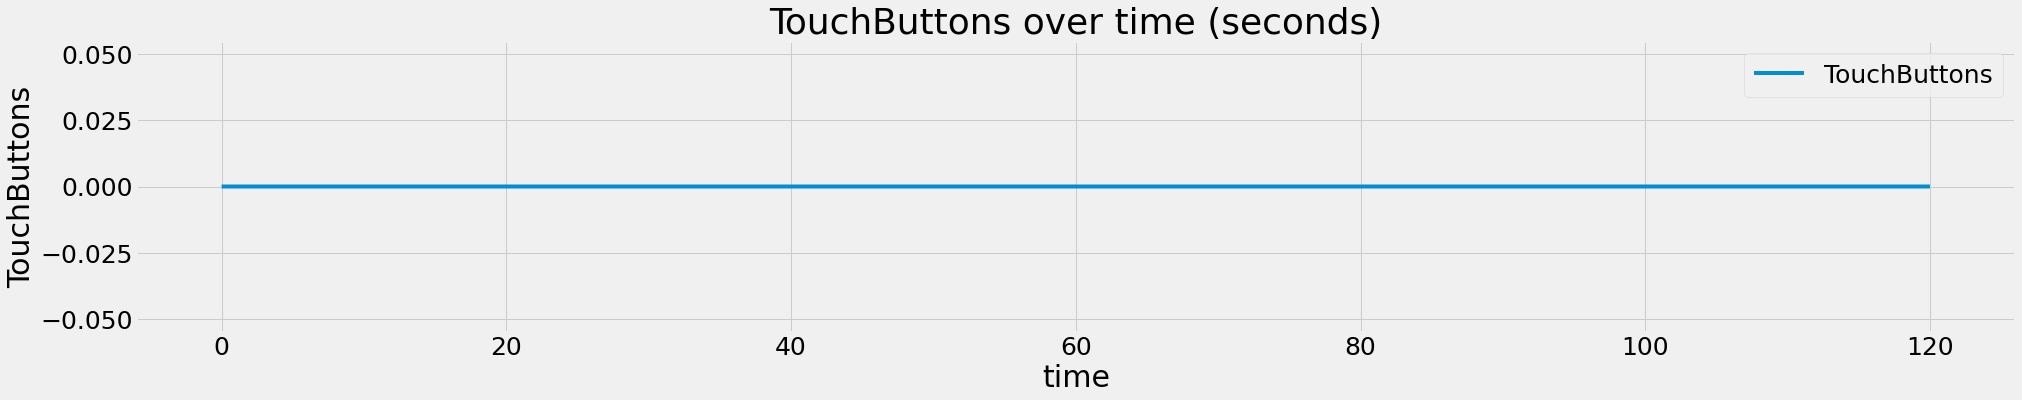

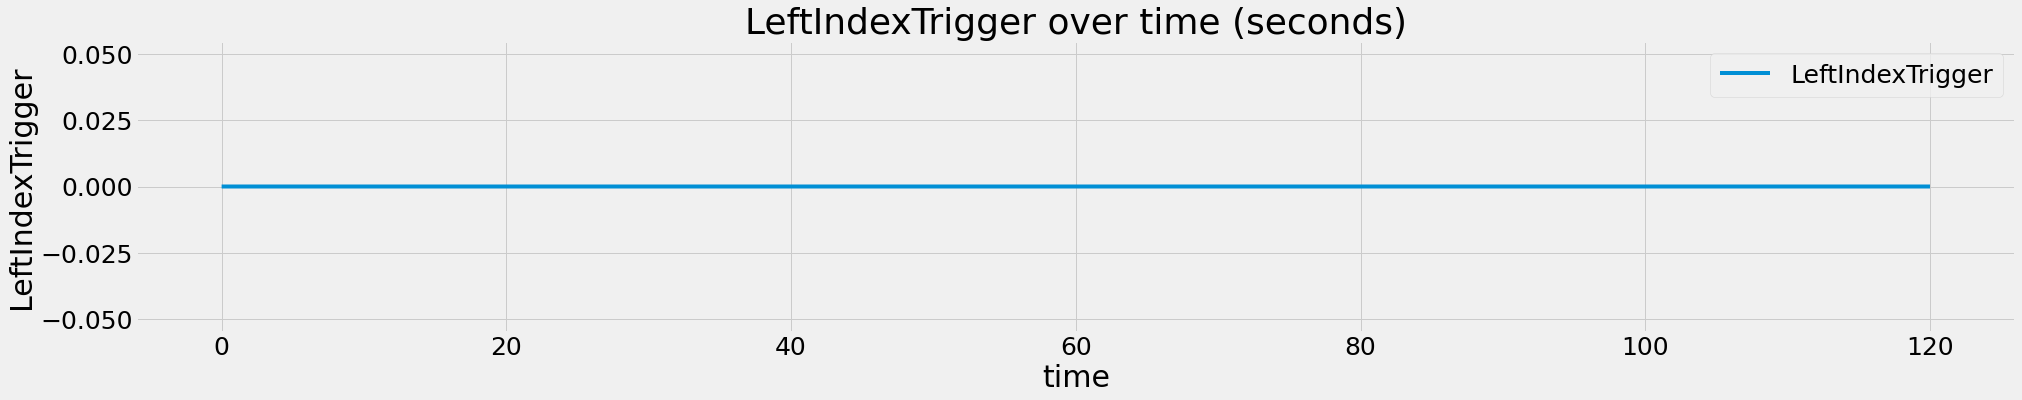

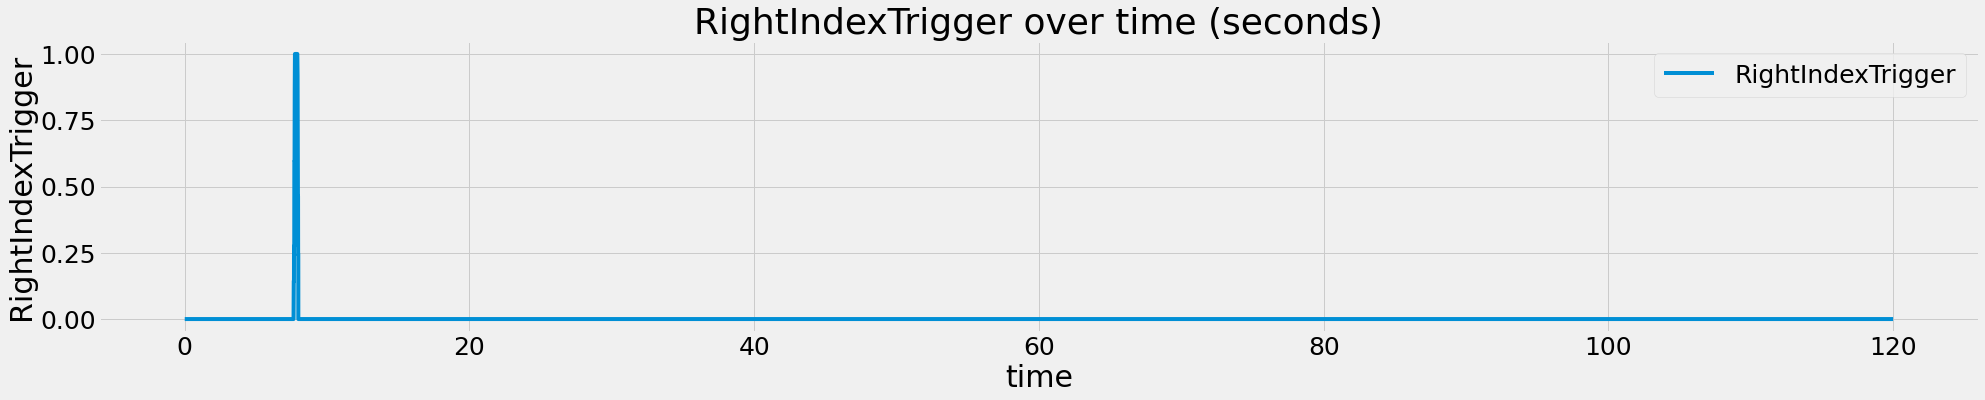

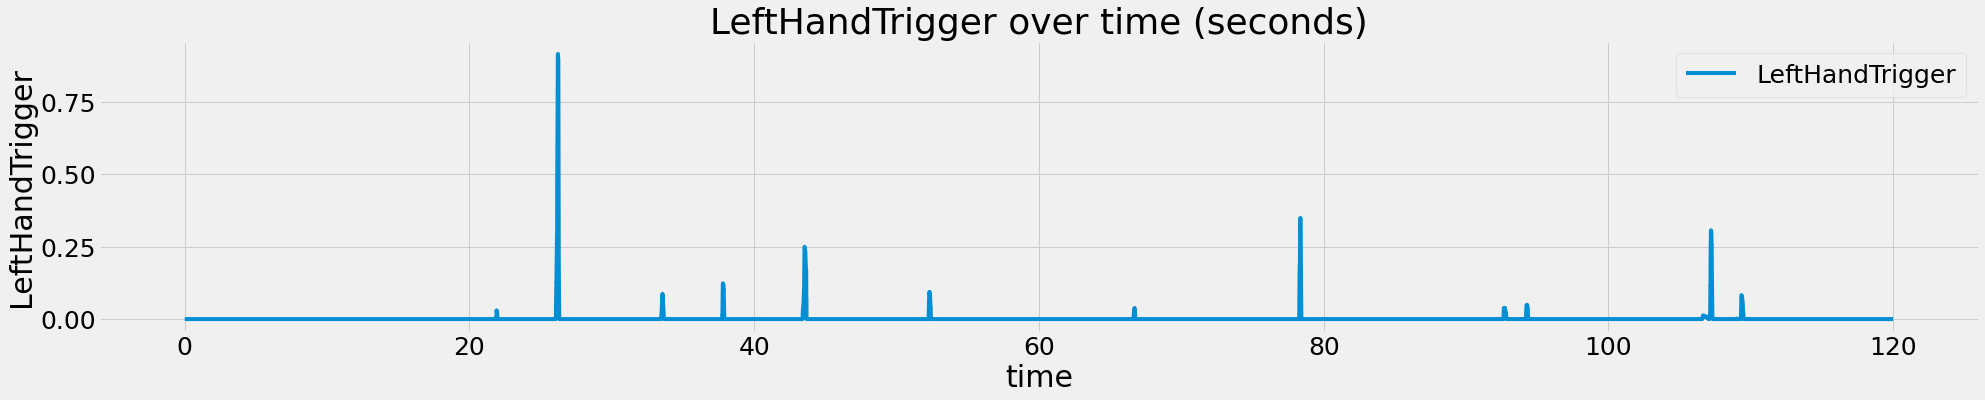

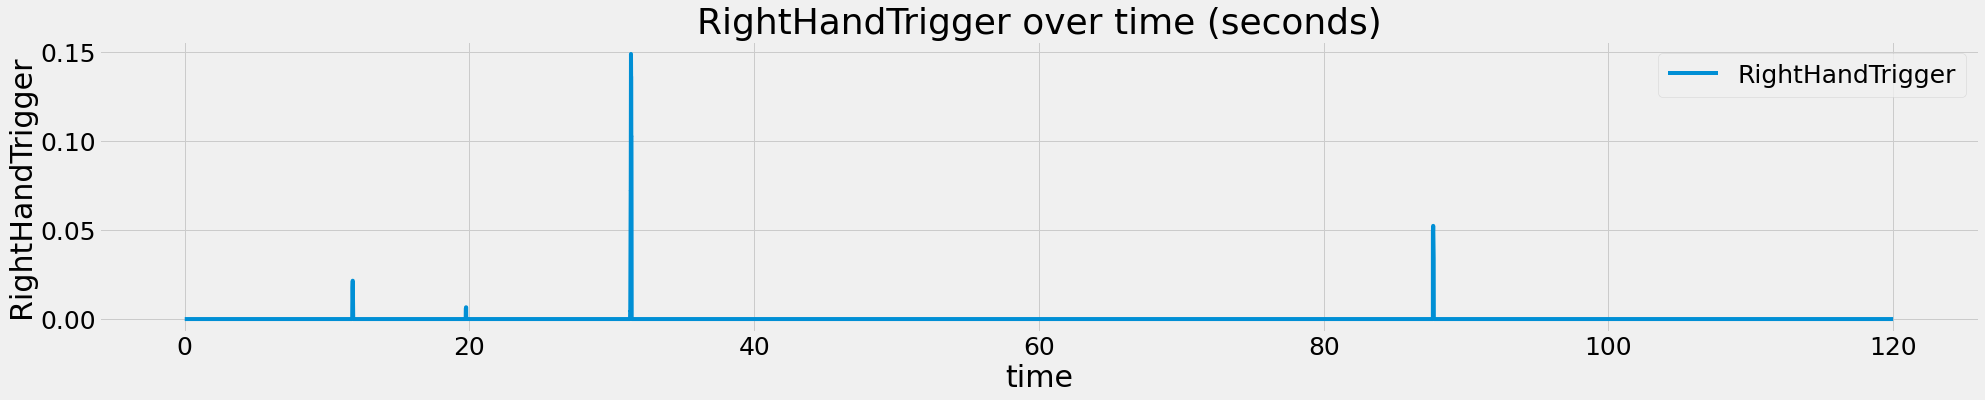

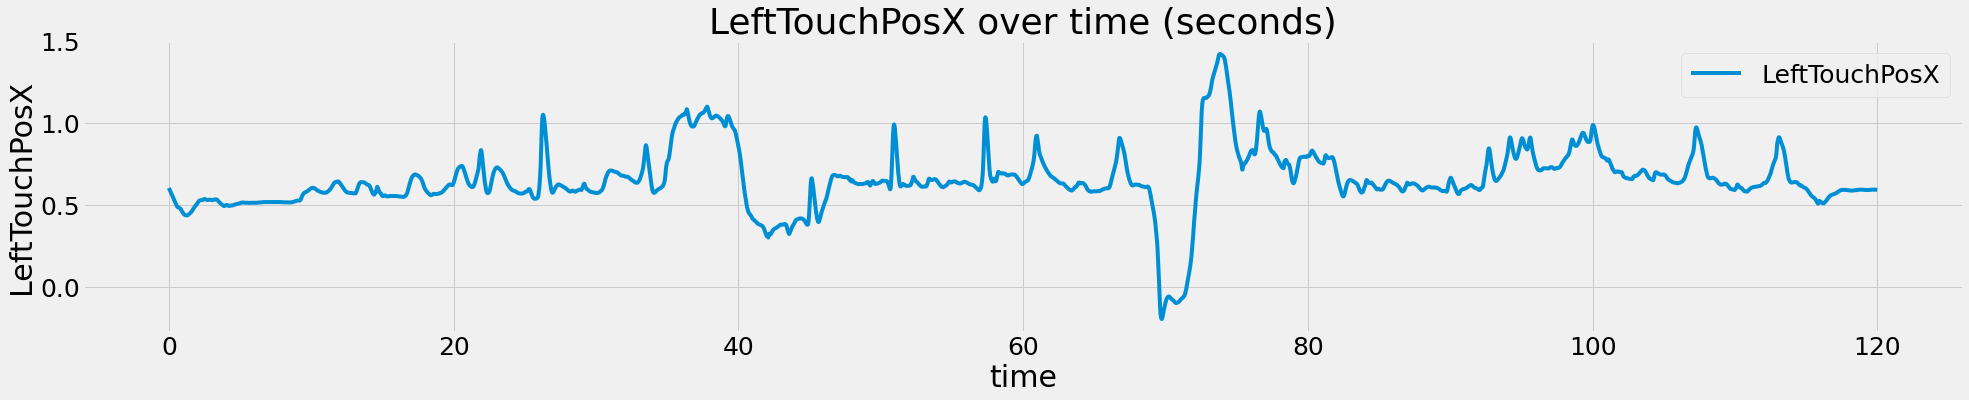

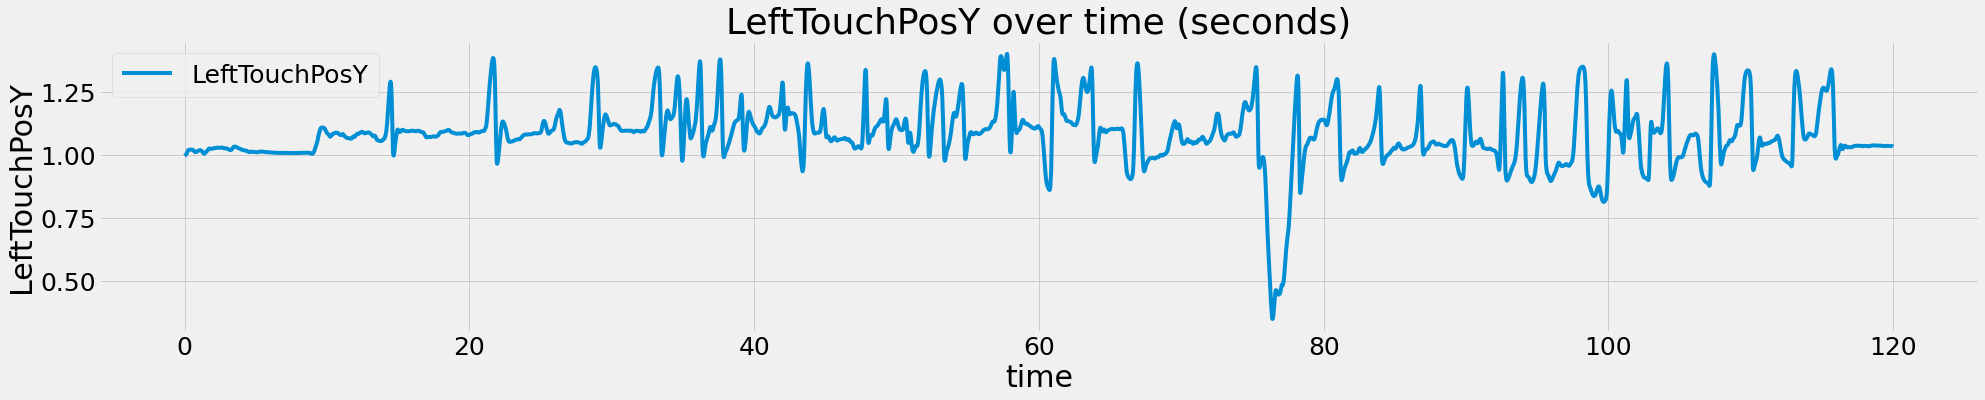

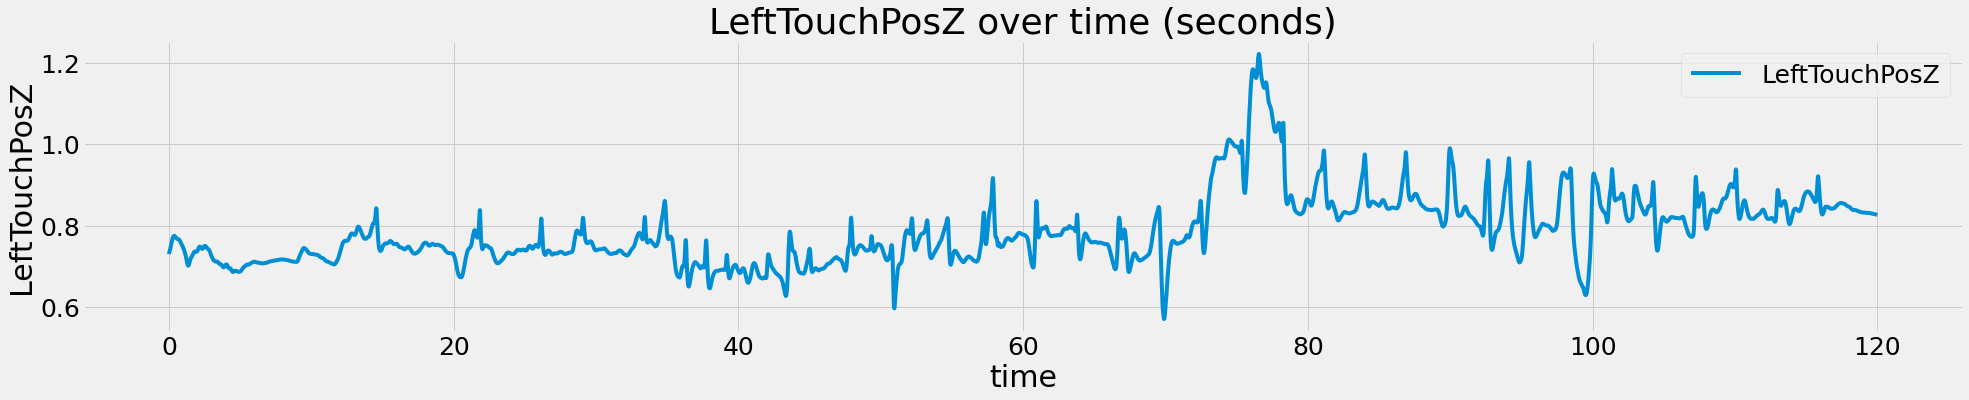

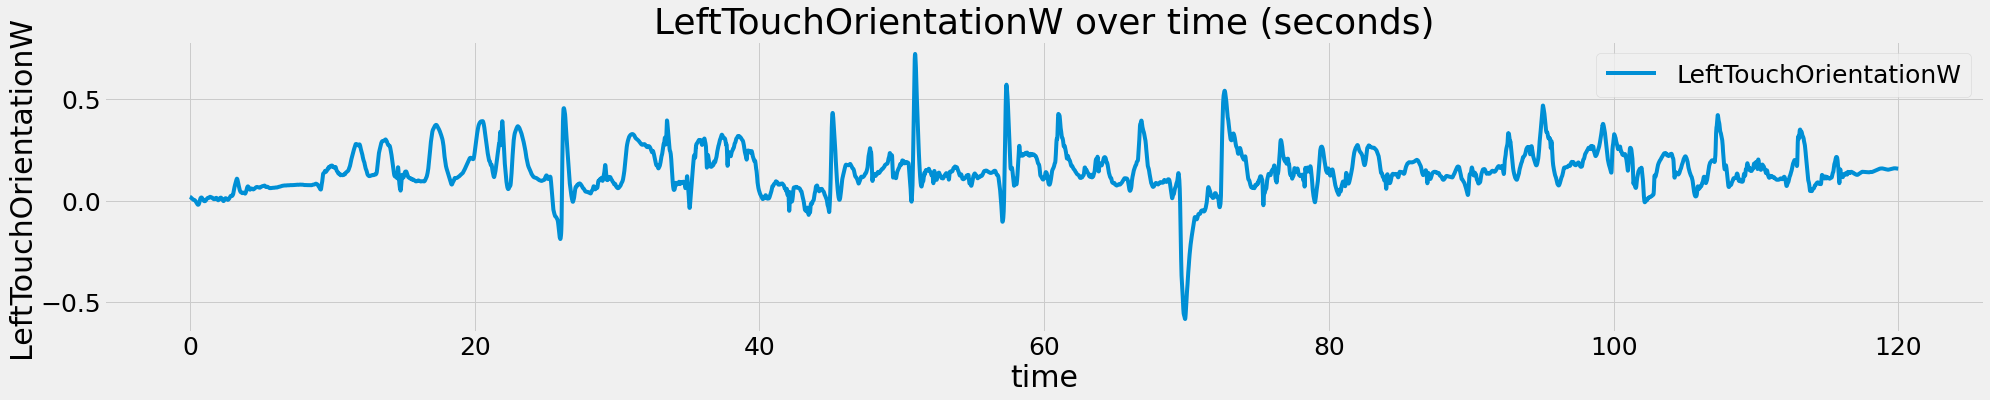

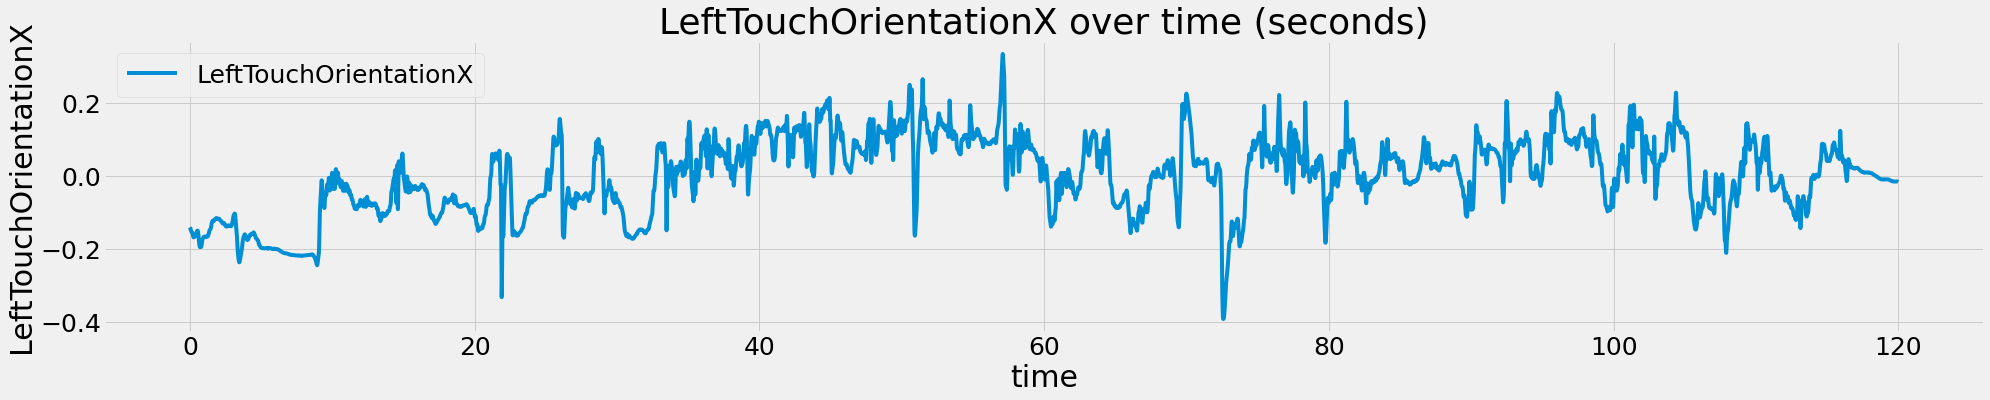

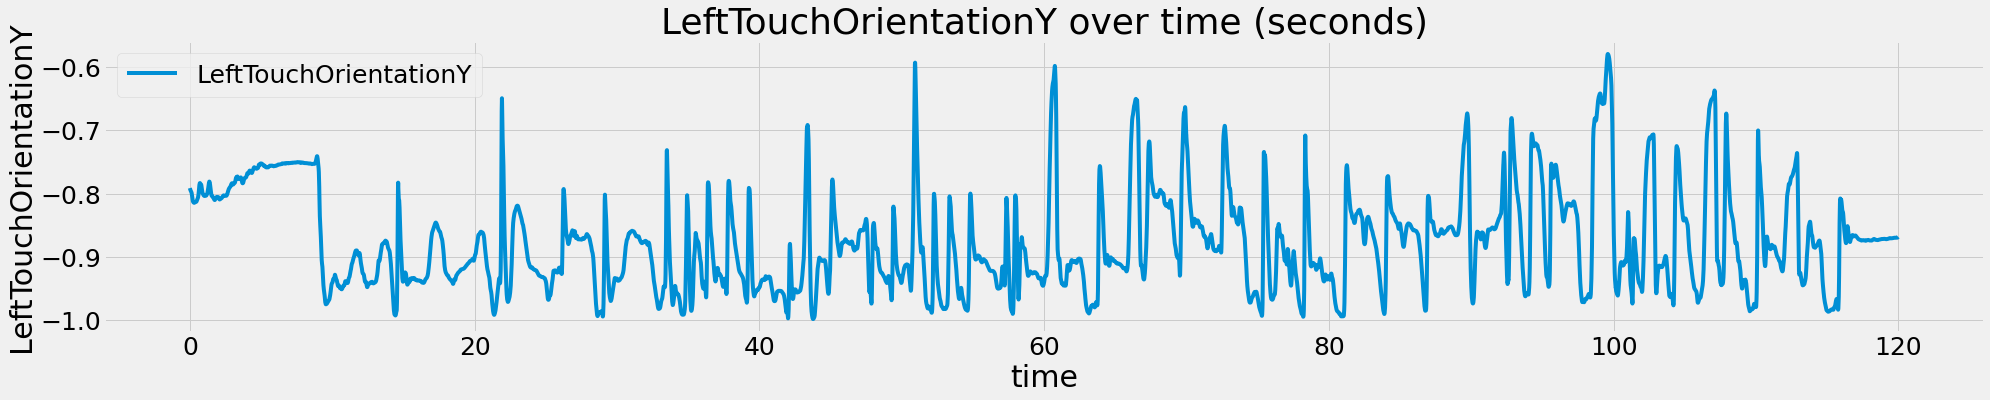

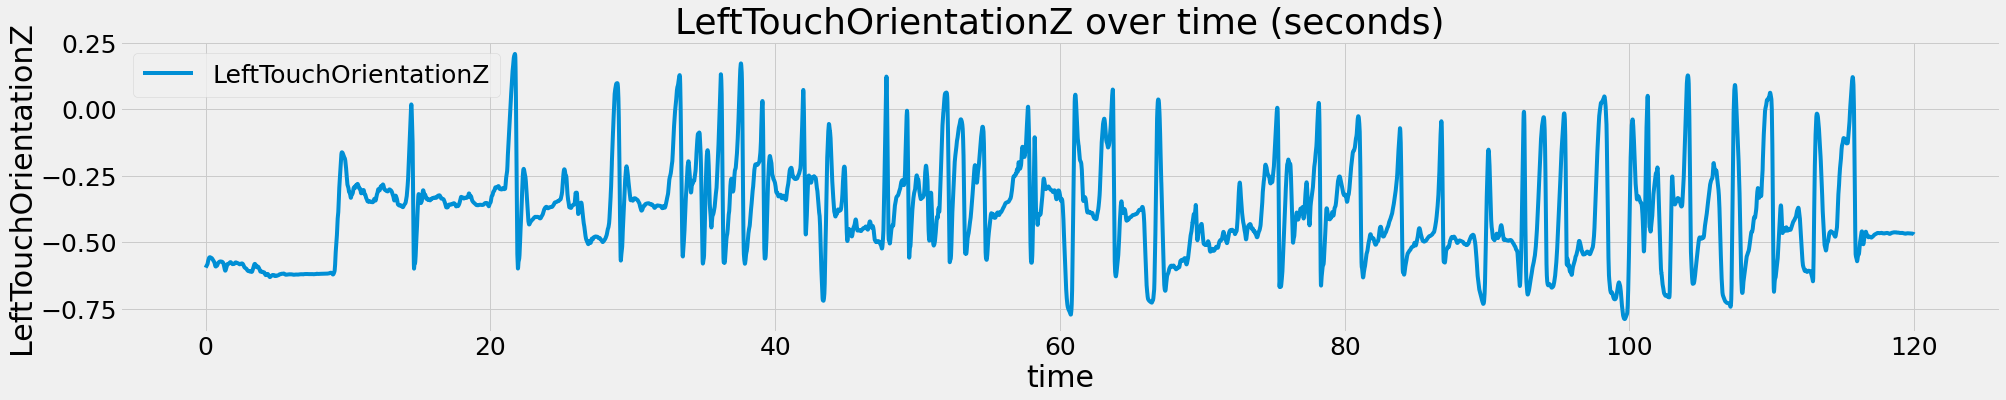

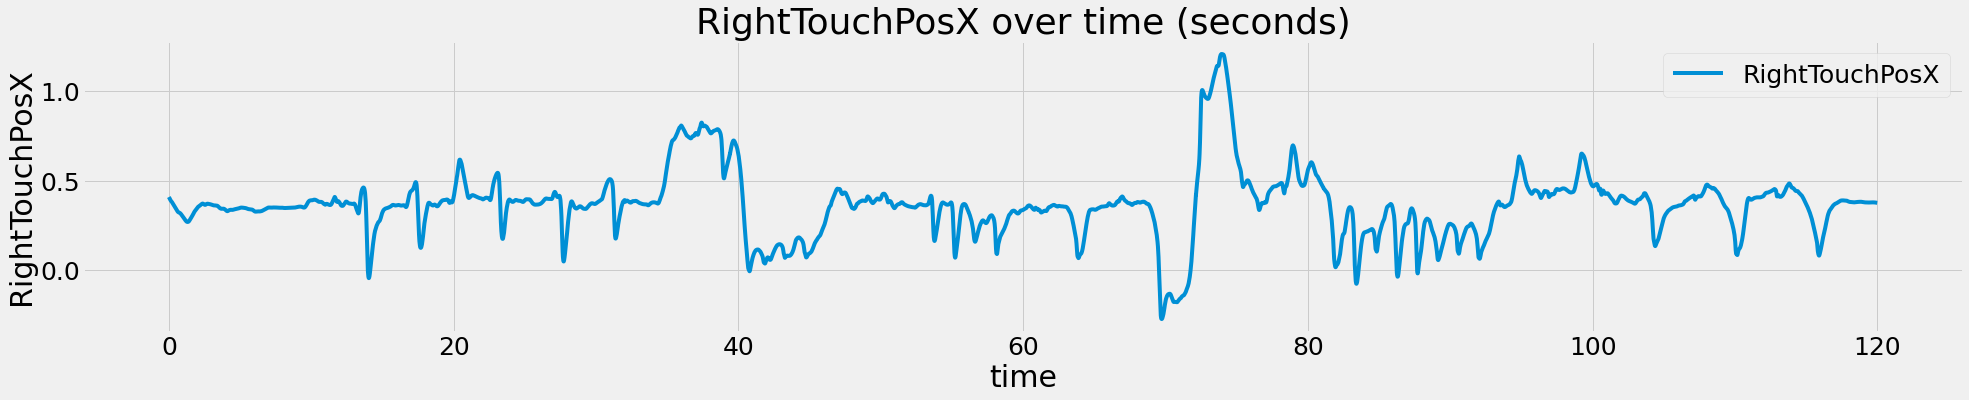

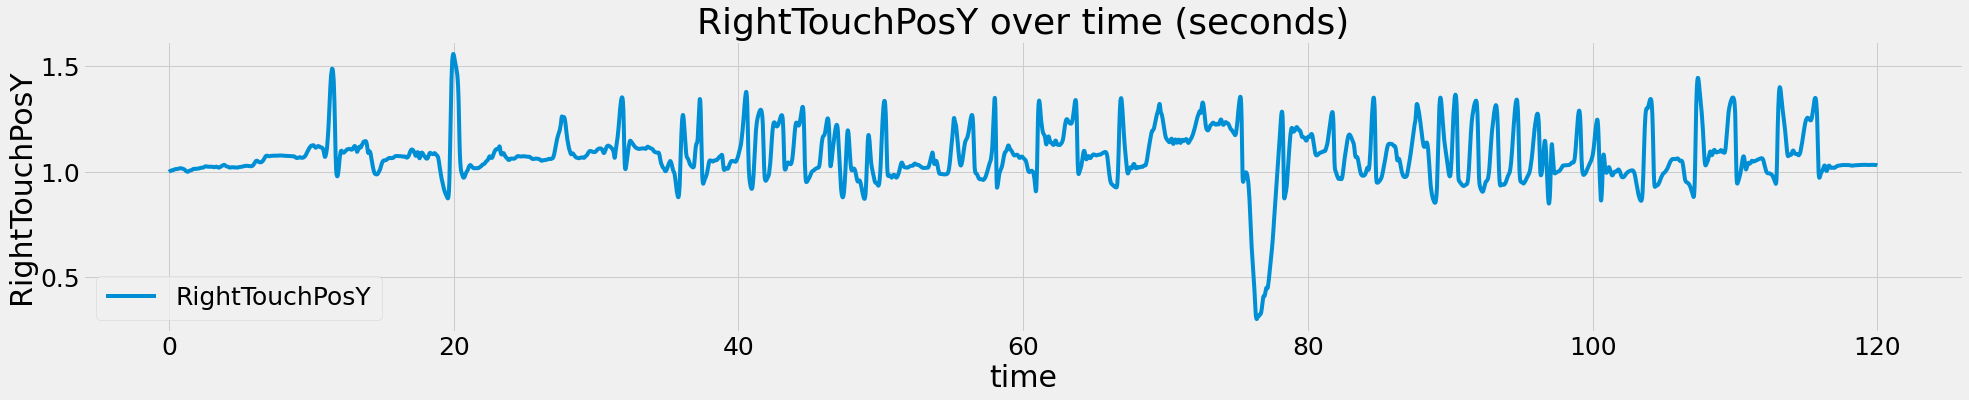

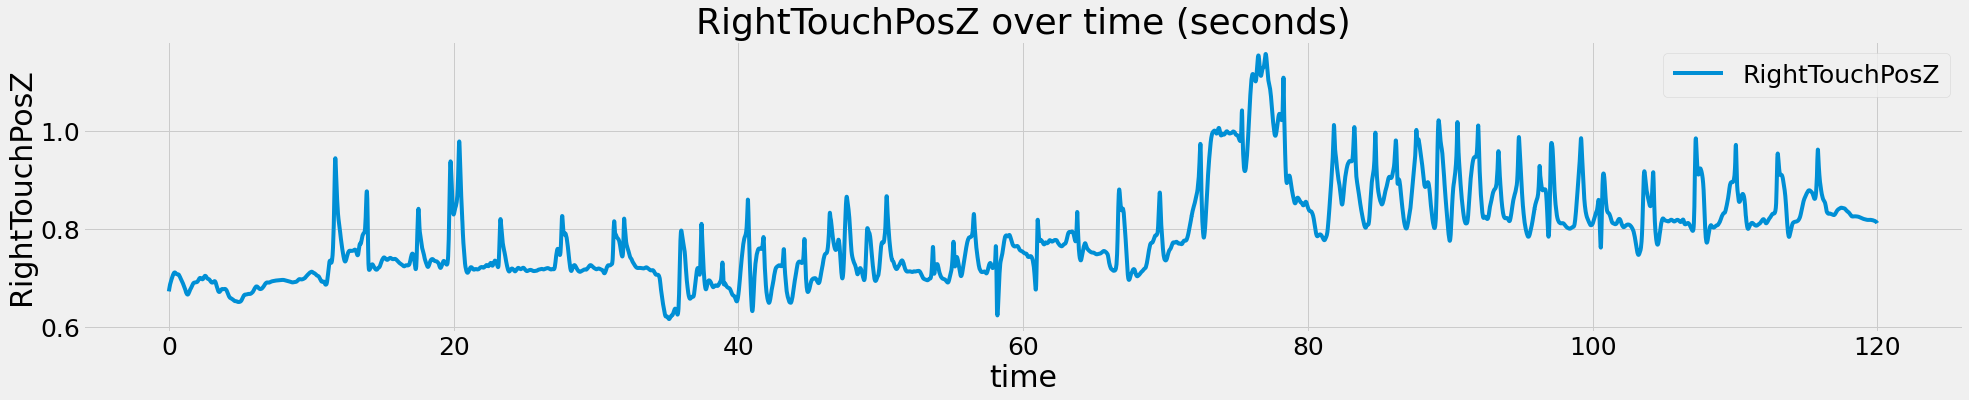

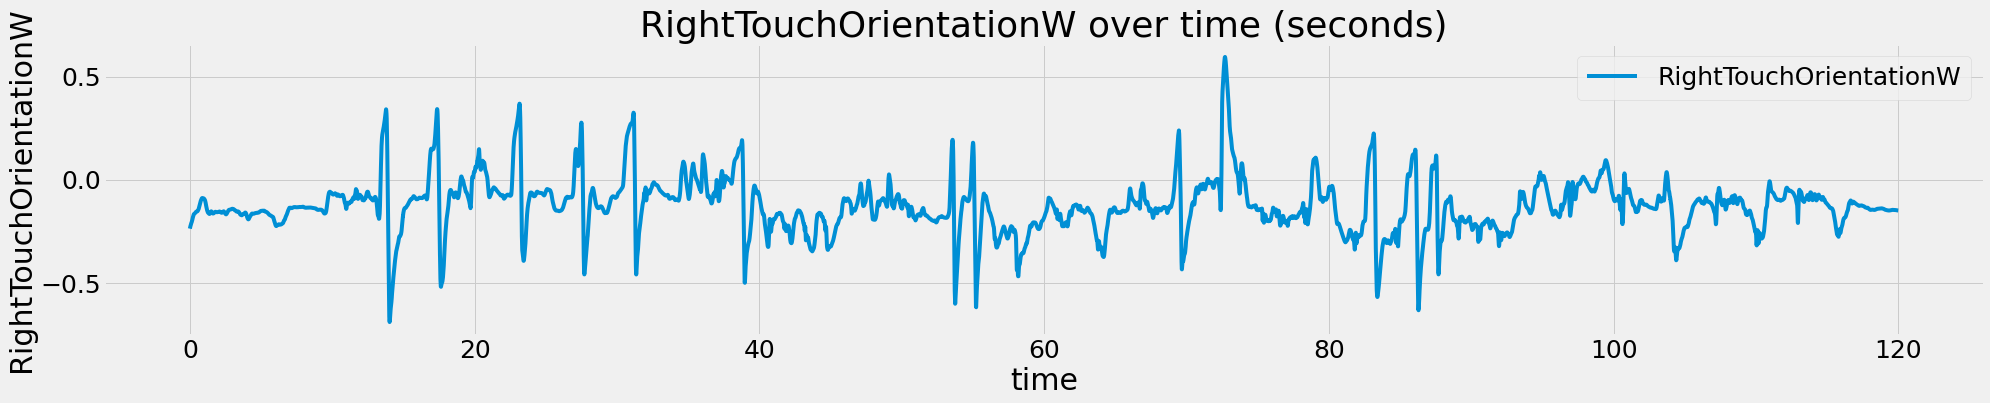

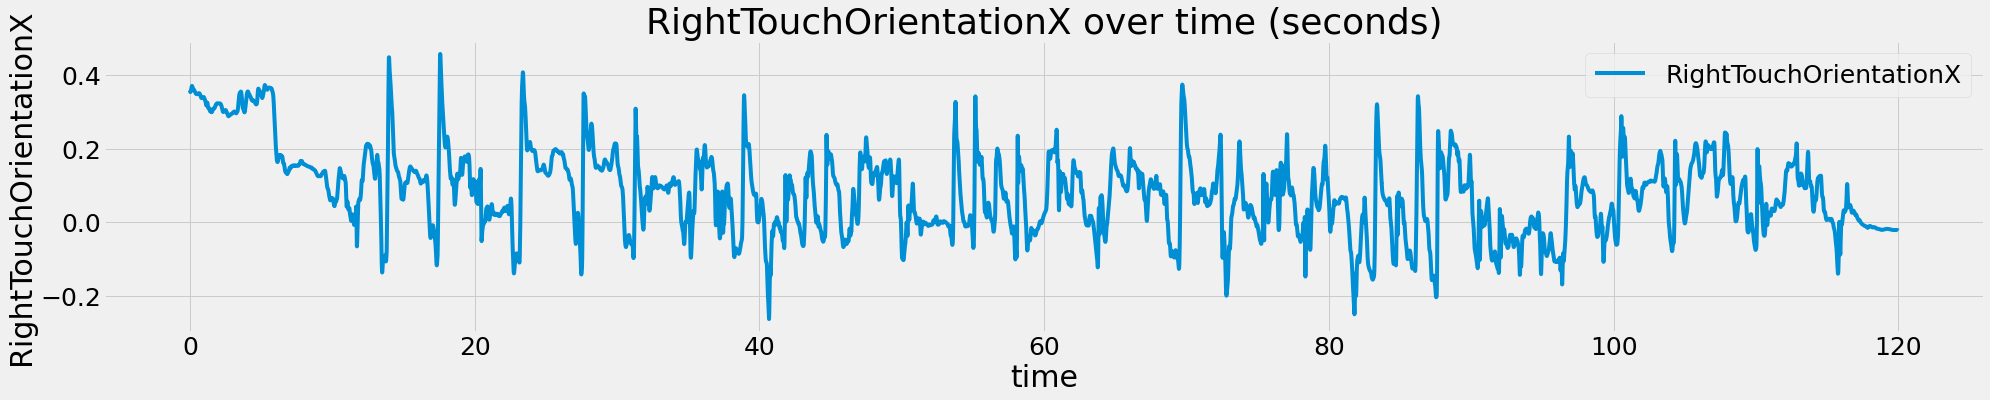

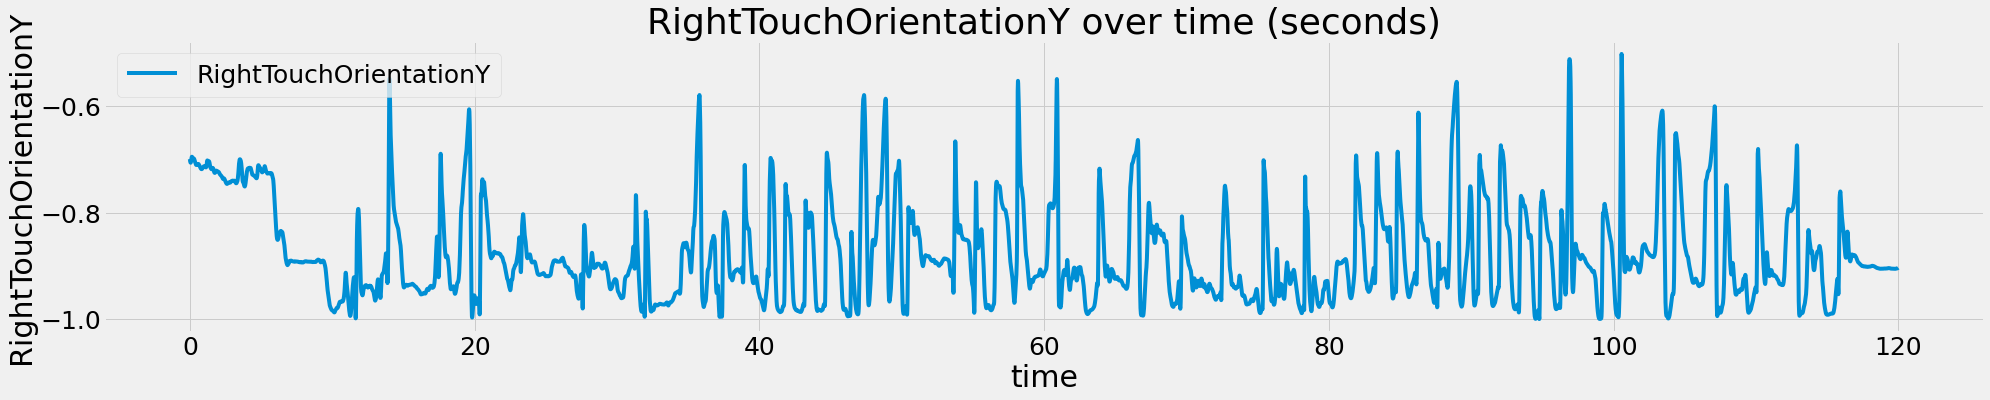

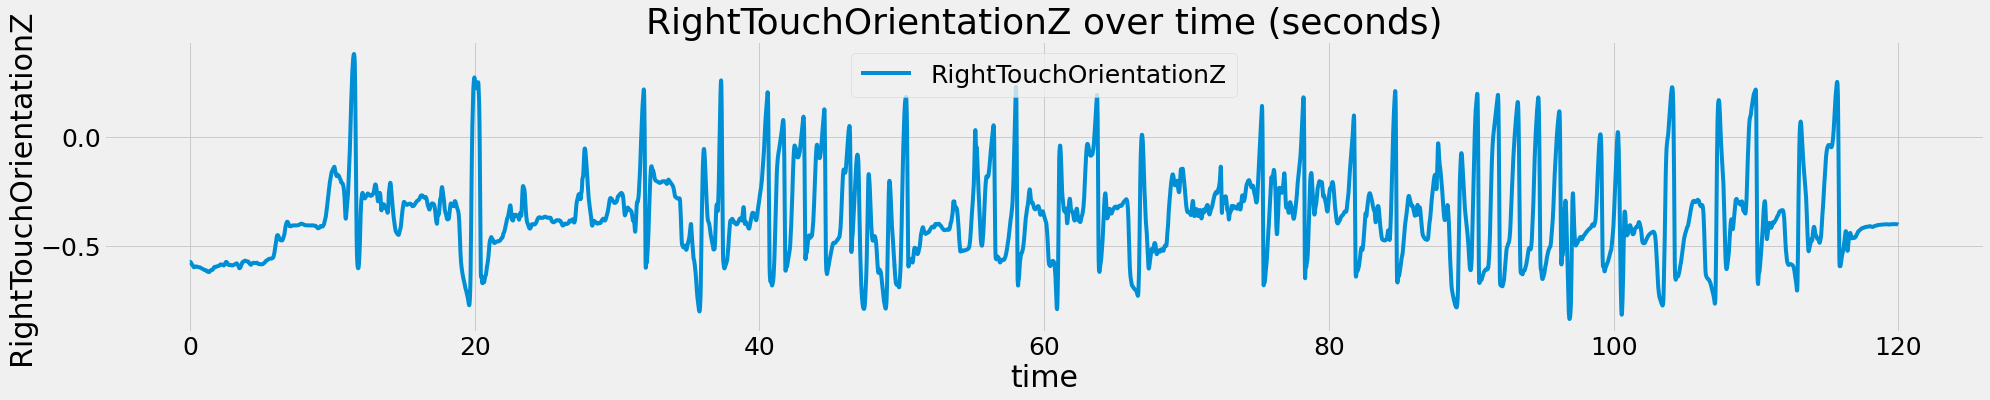

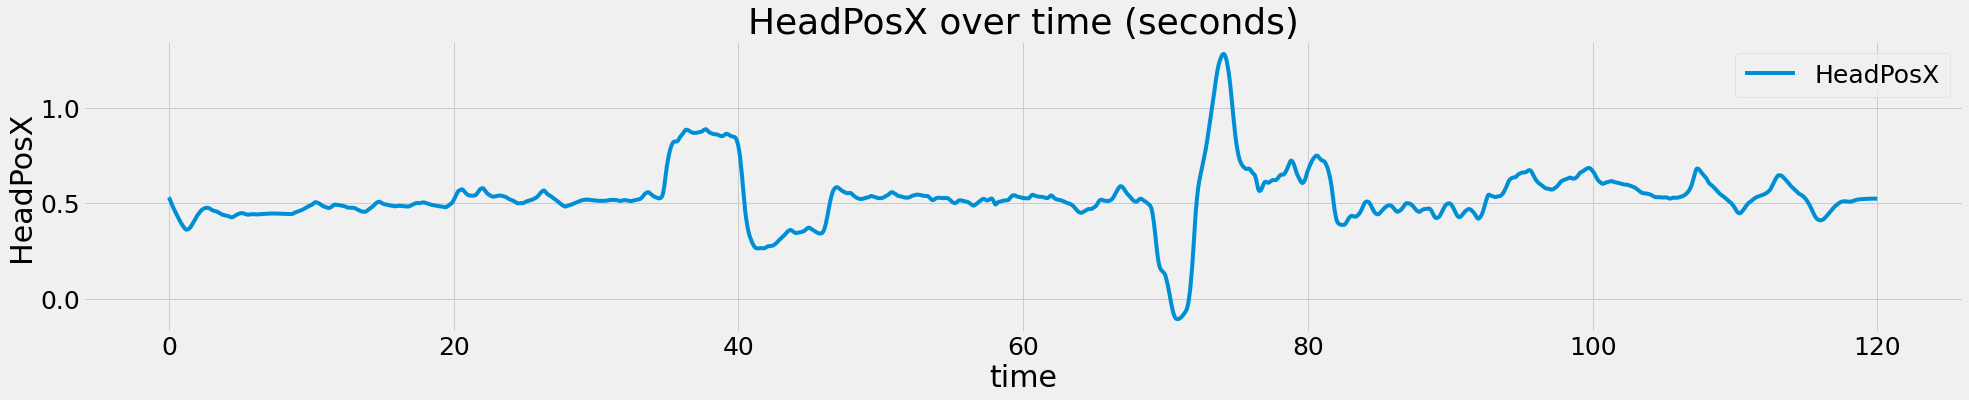

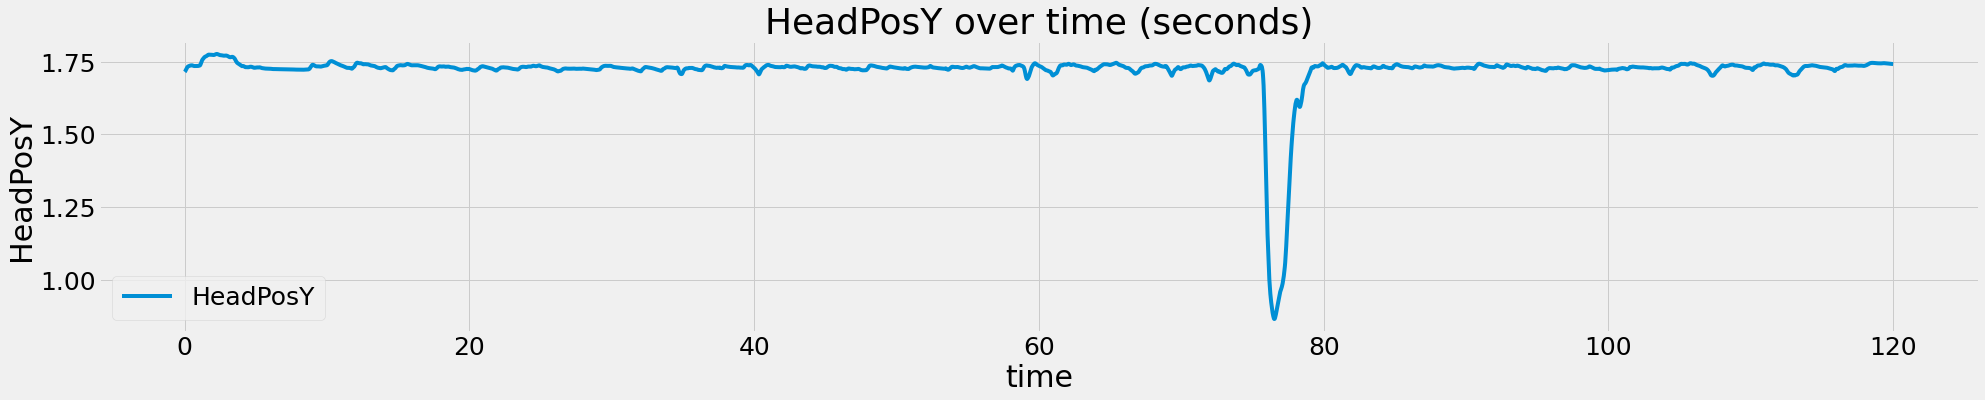

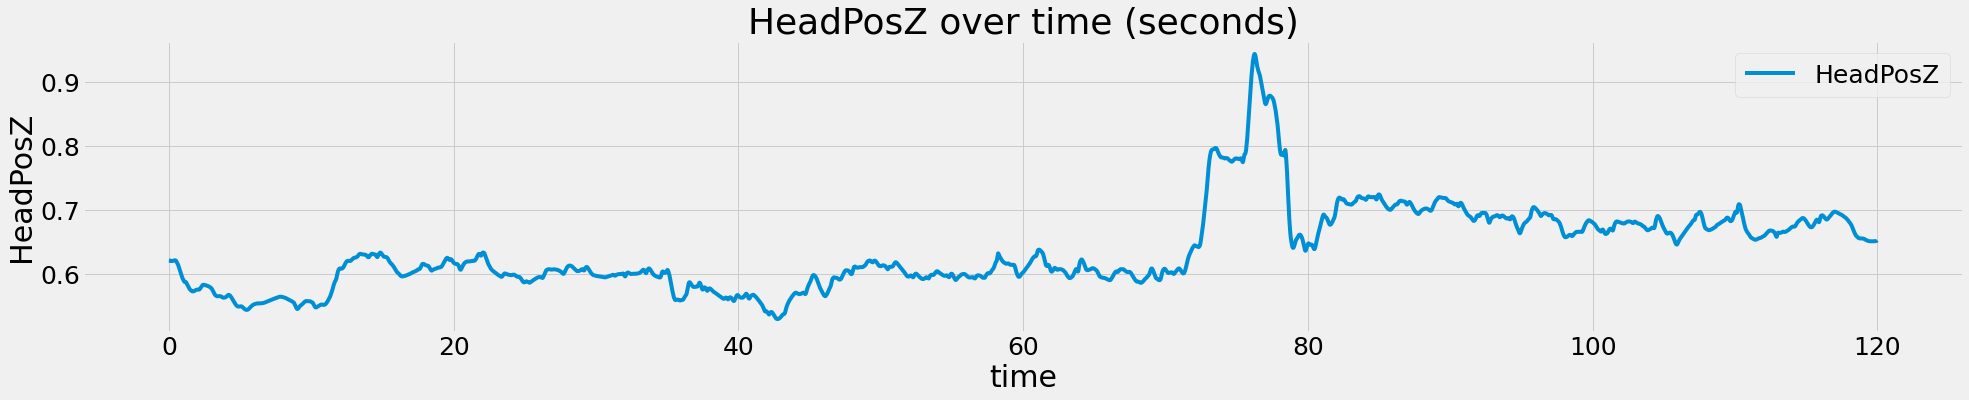

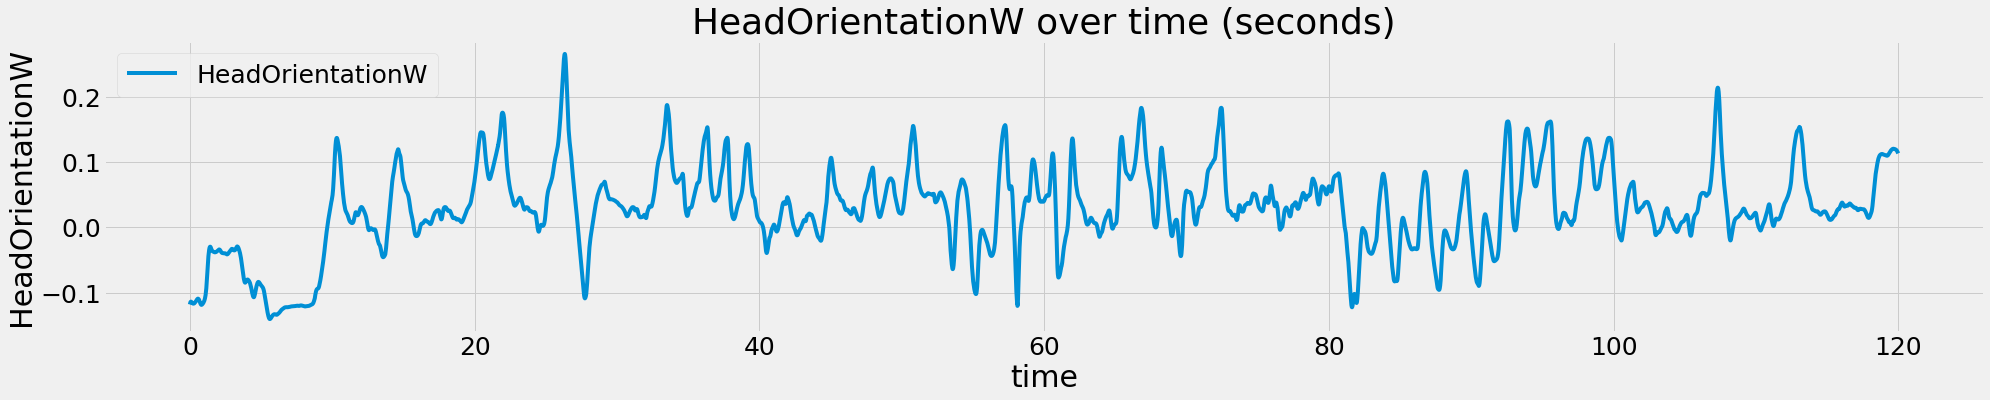

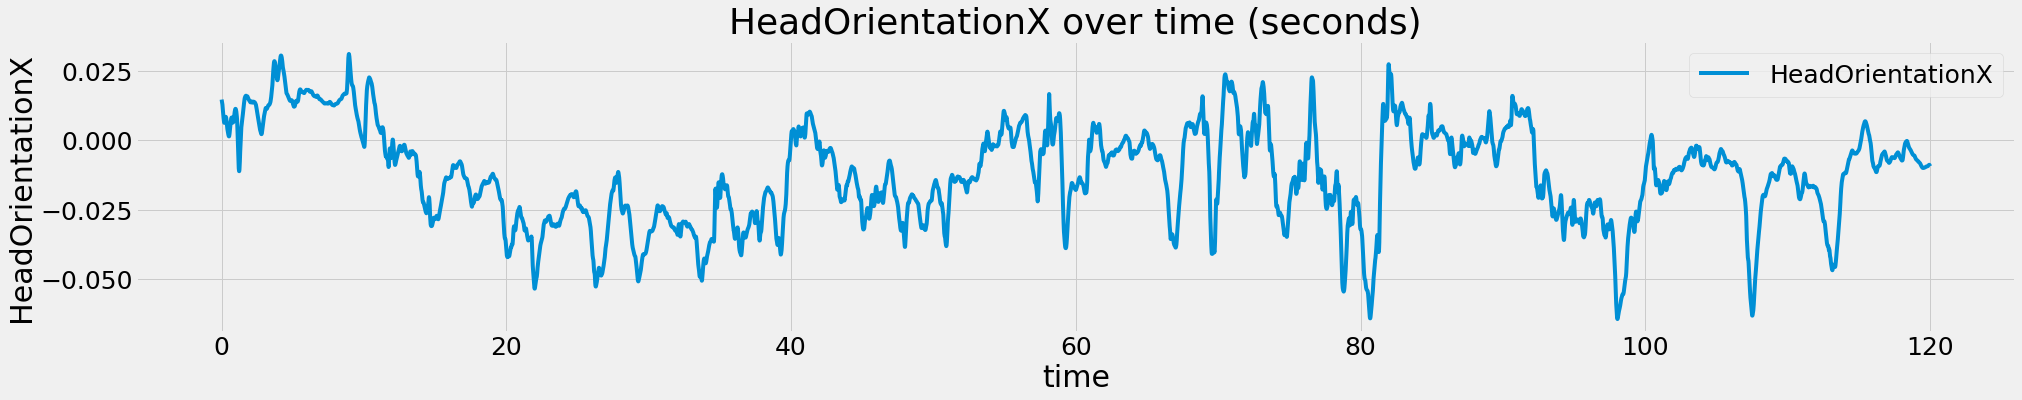

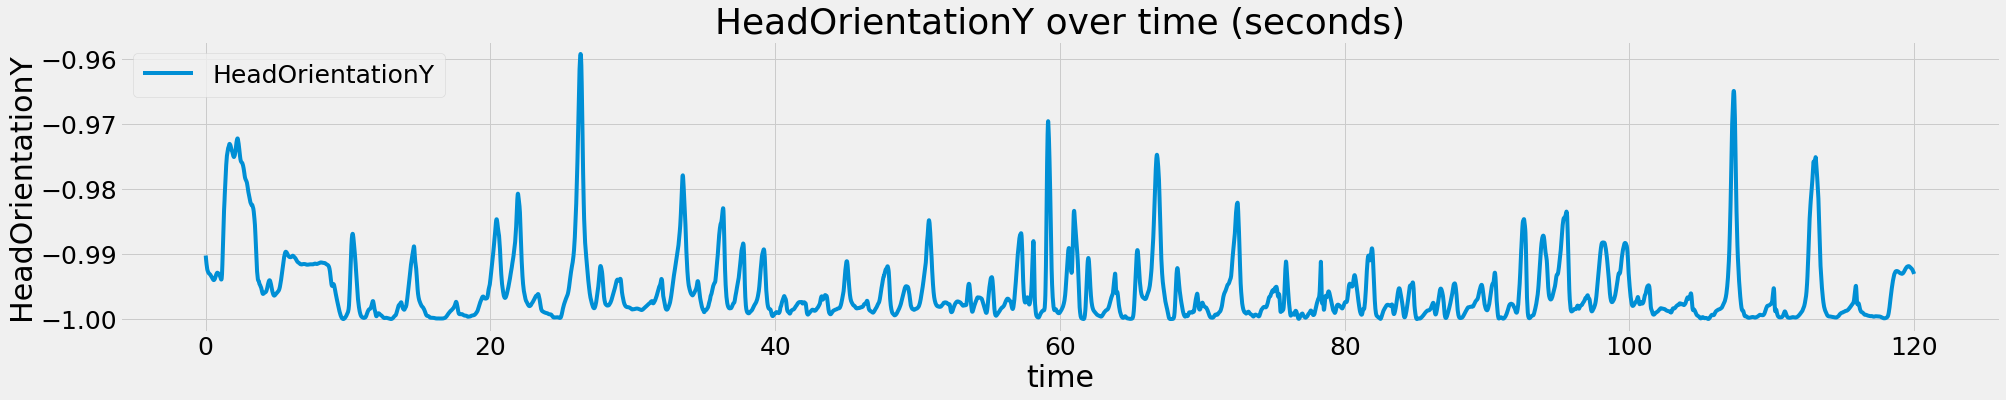

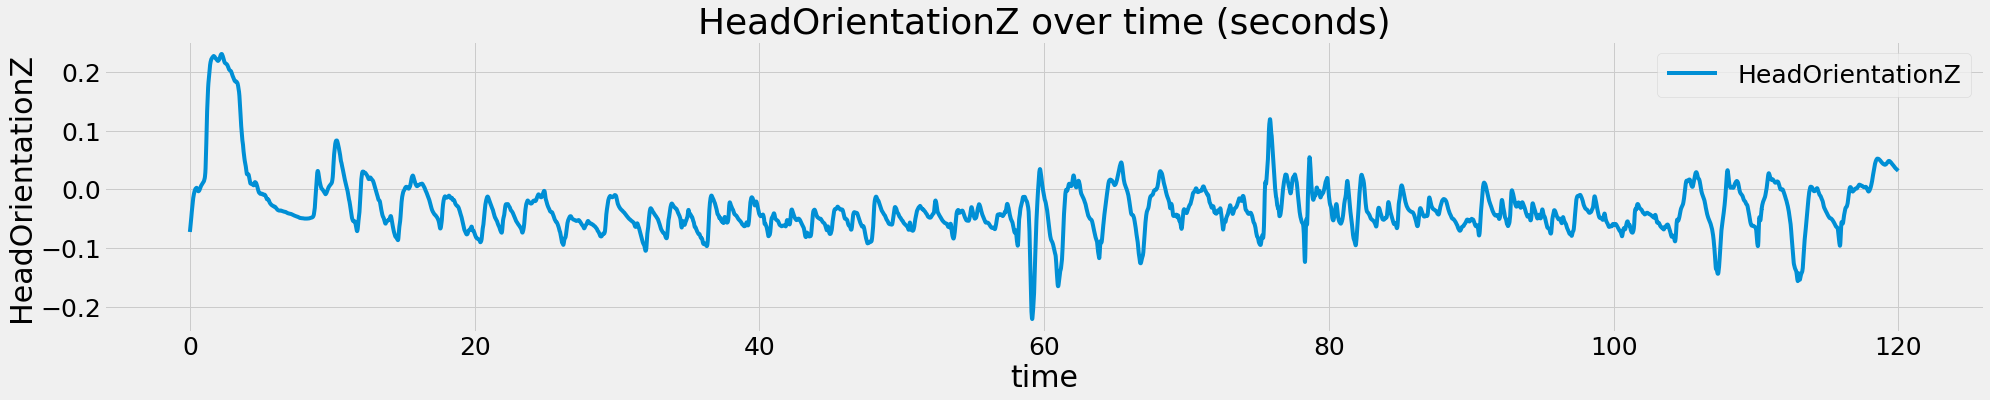

In [14]:
def plot_features_over_time(df, amount_of_seconds, time_column="time"):
    """
    Plots each feature in the DataFrame over time in separate plots.

    """
    df = df[df[time_column]<=amount_of_seconds]
    # Iterate over each column in the DataFrame, except the time column
    for column in df.columns:
        if column != time_column:
            plt.figure(figsize=(30, 5))  
            plt.plot(df[time_column], df[column], label=column)
            plt.xlabel(time_column)
            plt.ylabel(column)
            plt.title(f'{column} over {time_column} (seconds)')
            plt.legend()
plot_features_over_time(participant_mov_fast, 120, time_column="time")

### 1.2.4. Traffic Data

In [24]:
participant_traffic_fast = pd.read_csv("../data/raw/Raw_traffic_and_movement_data/group1_order1_user7/group1_order1_user7_fast_traffic.csv")
participant_traffic_slow = pd.read_csv("../data/raw/Raw_traffic_and_movement_data/group1_order1_user7/group1_order1_user7_slow_traffic.csv")

#### 1.2.4.1. Features Over Time ( One Participant )

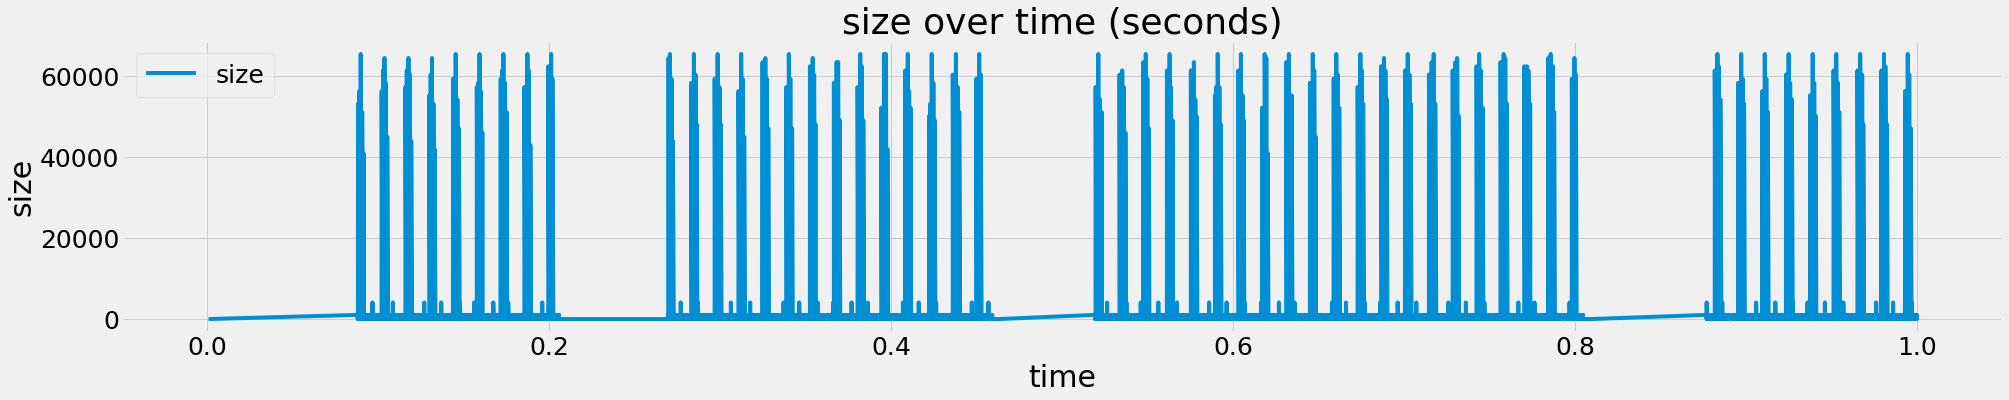

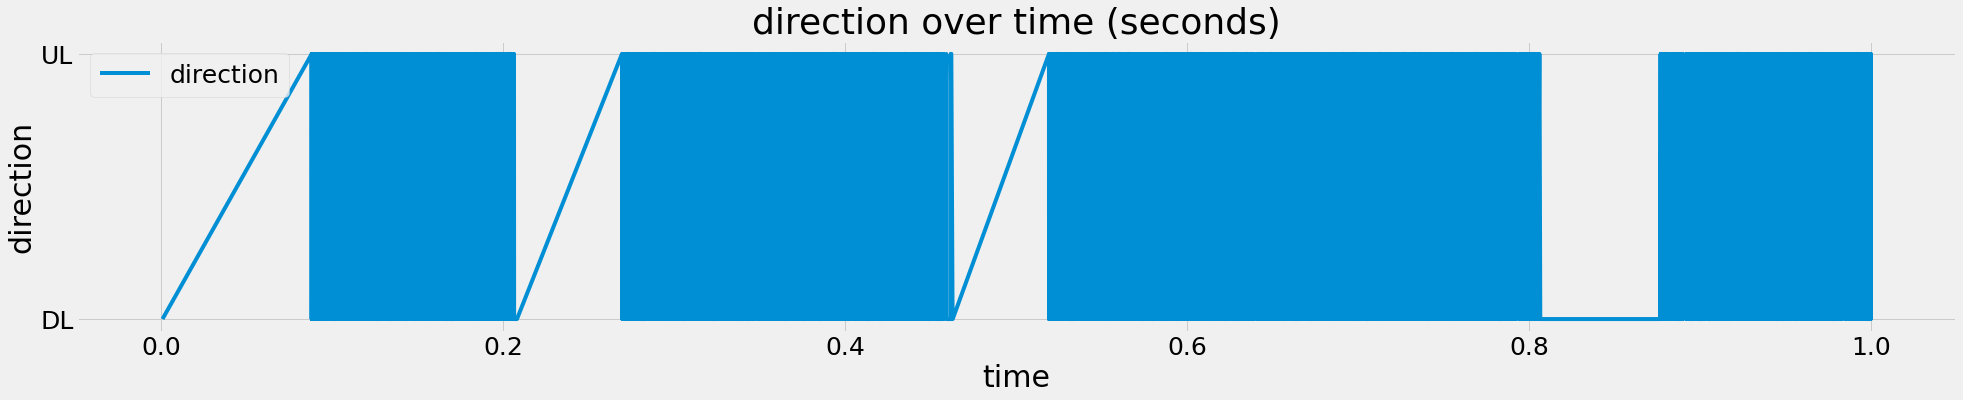

In [25]:
plot_features_over_time(participant_traffic_fast, 1, time_column="time")

## 1.5. Bivariate / Multivariate Descriptive Analysis:

### 1.5.1. Movement Data

#### 1.5.1.1. 3D Scatter Plot of User Movements ( One Participant )

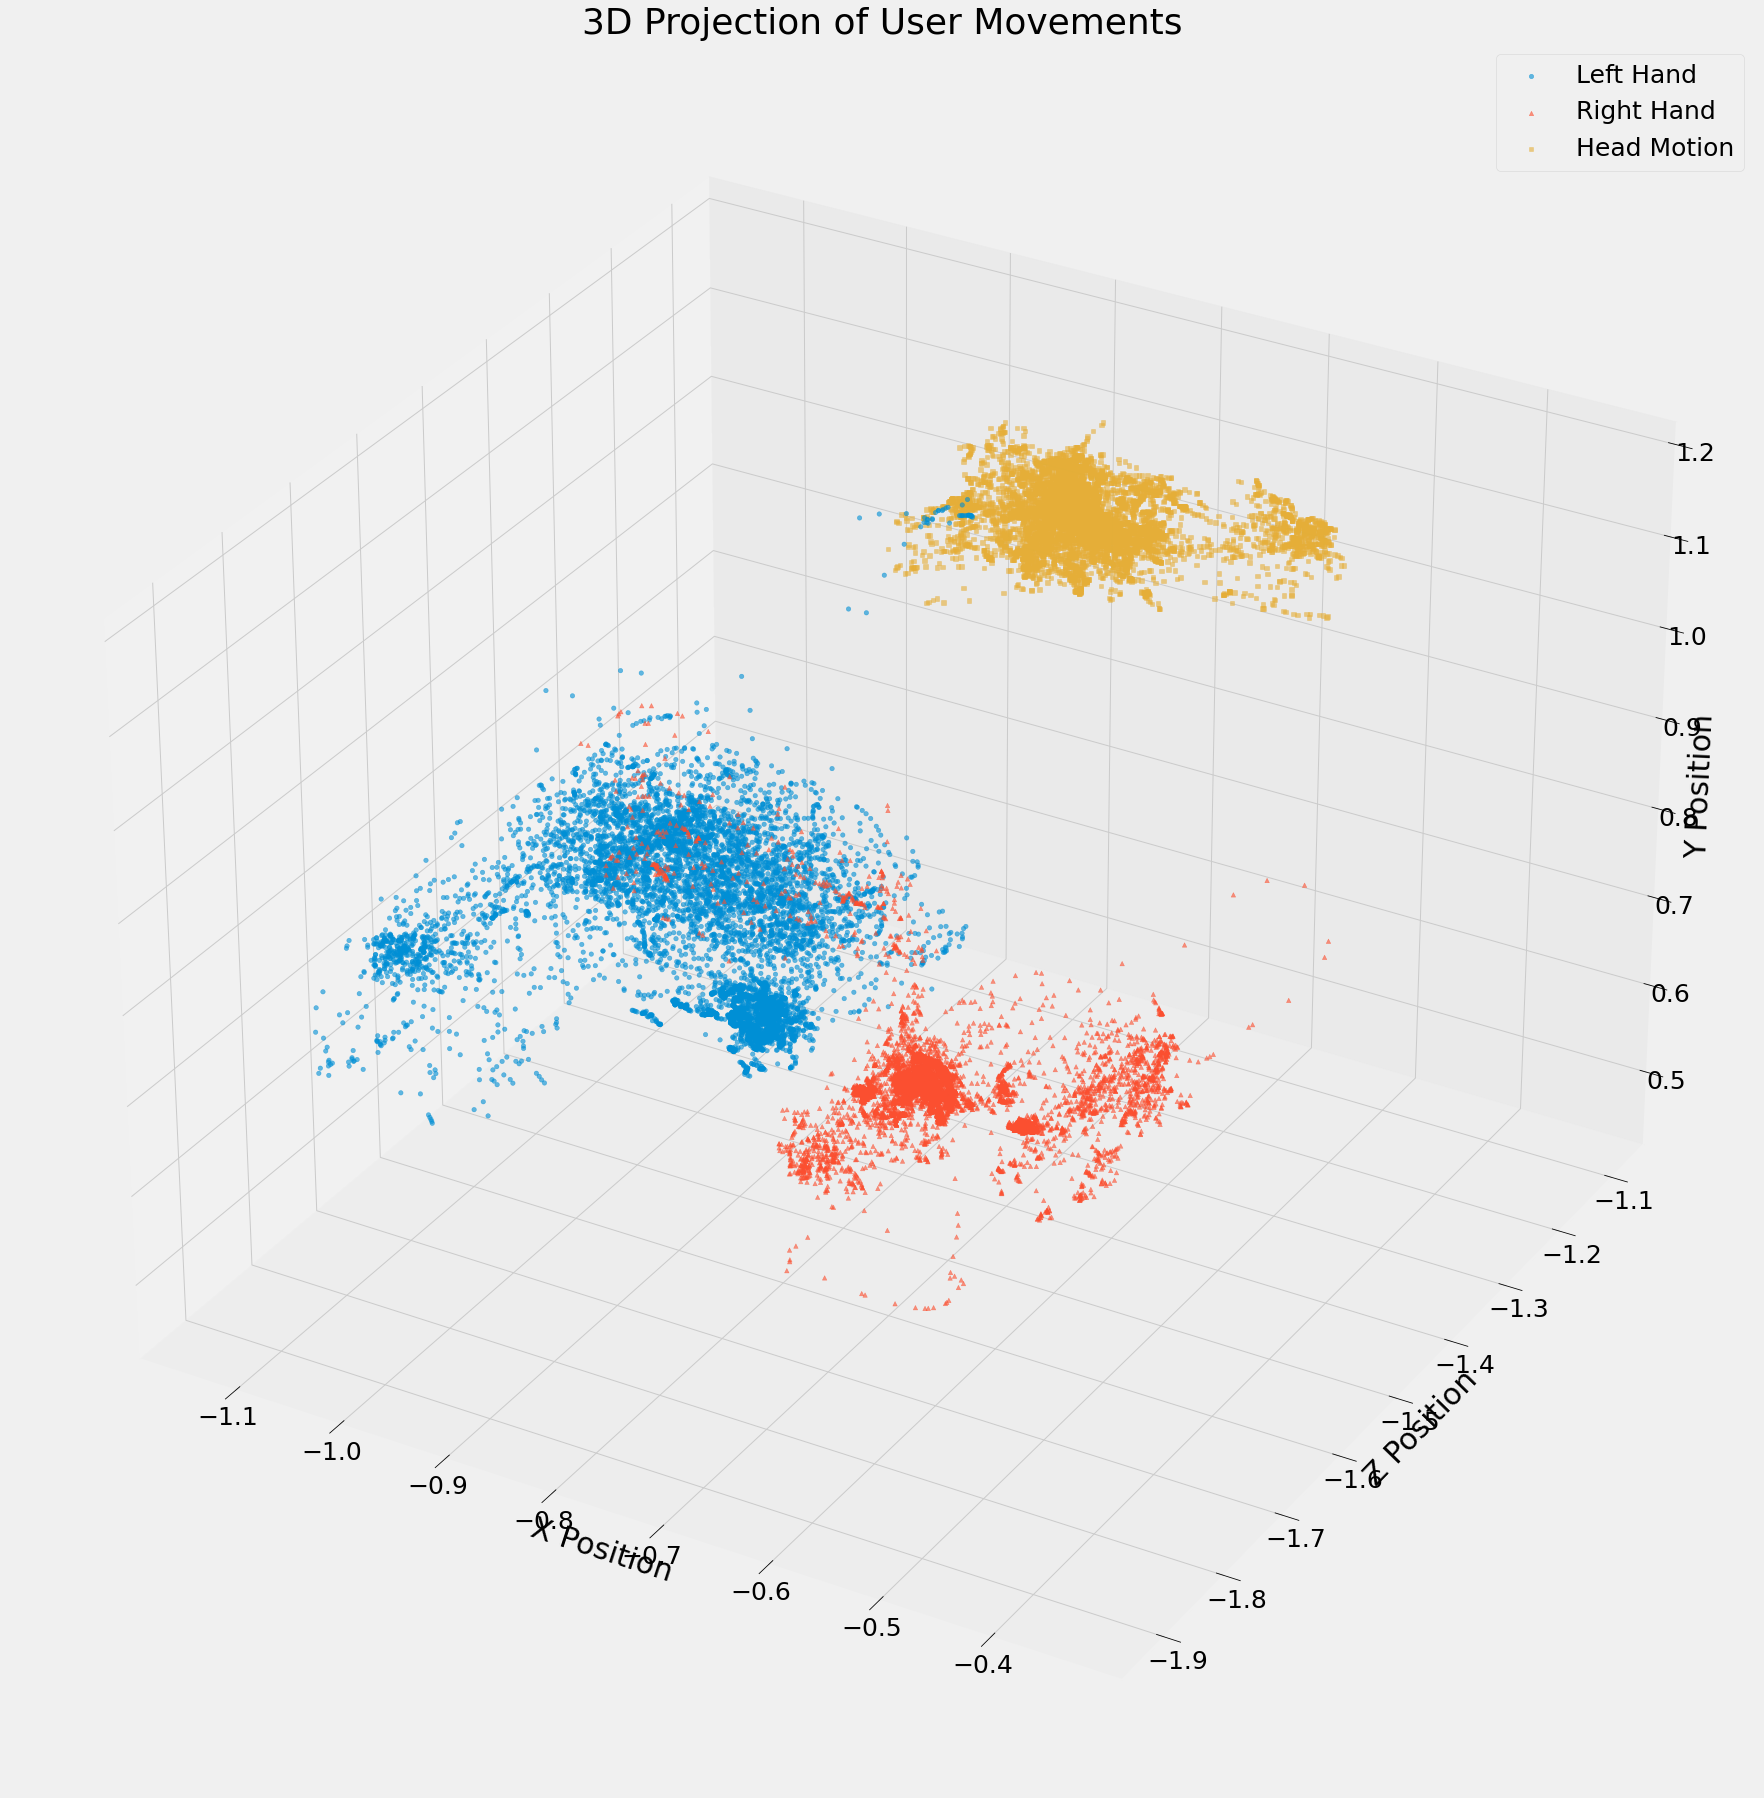

In [10]:
def plot_user_movements(df, sample_size=10000):

    fig = plt.figure(figsize=(60, 30))
    ax = fig.add_subplot(111, projection="3d")
    sampled_df = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Plotting the sampled data
    ax.scatter(sampled_df['LeftTouchPosX'], sampled_df['LeftTouchPosZ'],  sampled_df['LeftTouchPosY'], 
               marker="o", label="Left Hand", alpha=0.6)
    ax.scatter(sampled_df['RightTouchPosX'], sampled_df['RightTouchPosZ'],  sampled_df['RightTouchPosY'], 
               marker="^", label="Right Hand", alpha=0.6)
    ax.scatter(sampled_df['HeadPosX'],sampled_df['HeadPosZ'], sampled_df['HeadPosY'], 
               marker="s", label="Head Motion", alpha=0.6)

    # Add axis labels
    ax.set_xlabel('X Position')
    ax.set_ylabel('Z Position')
    ax.set_zlabel('Y Position')

    # Enhance title and legend
    ax.set_title("3D Projection of User Movements")
    ax.legend(loc='upper right')
    
    plt.show()

plot_user_movements(df, sample_size=10000)

#### 1.5.1.2. Left and Right Index triggers Usage (Participant)

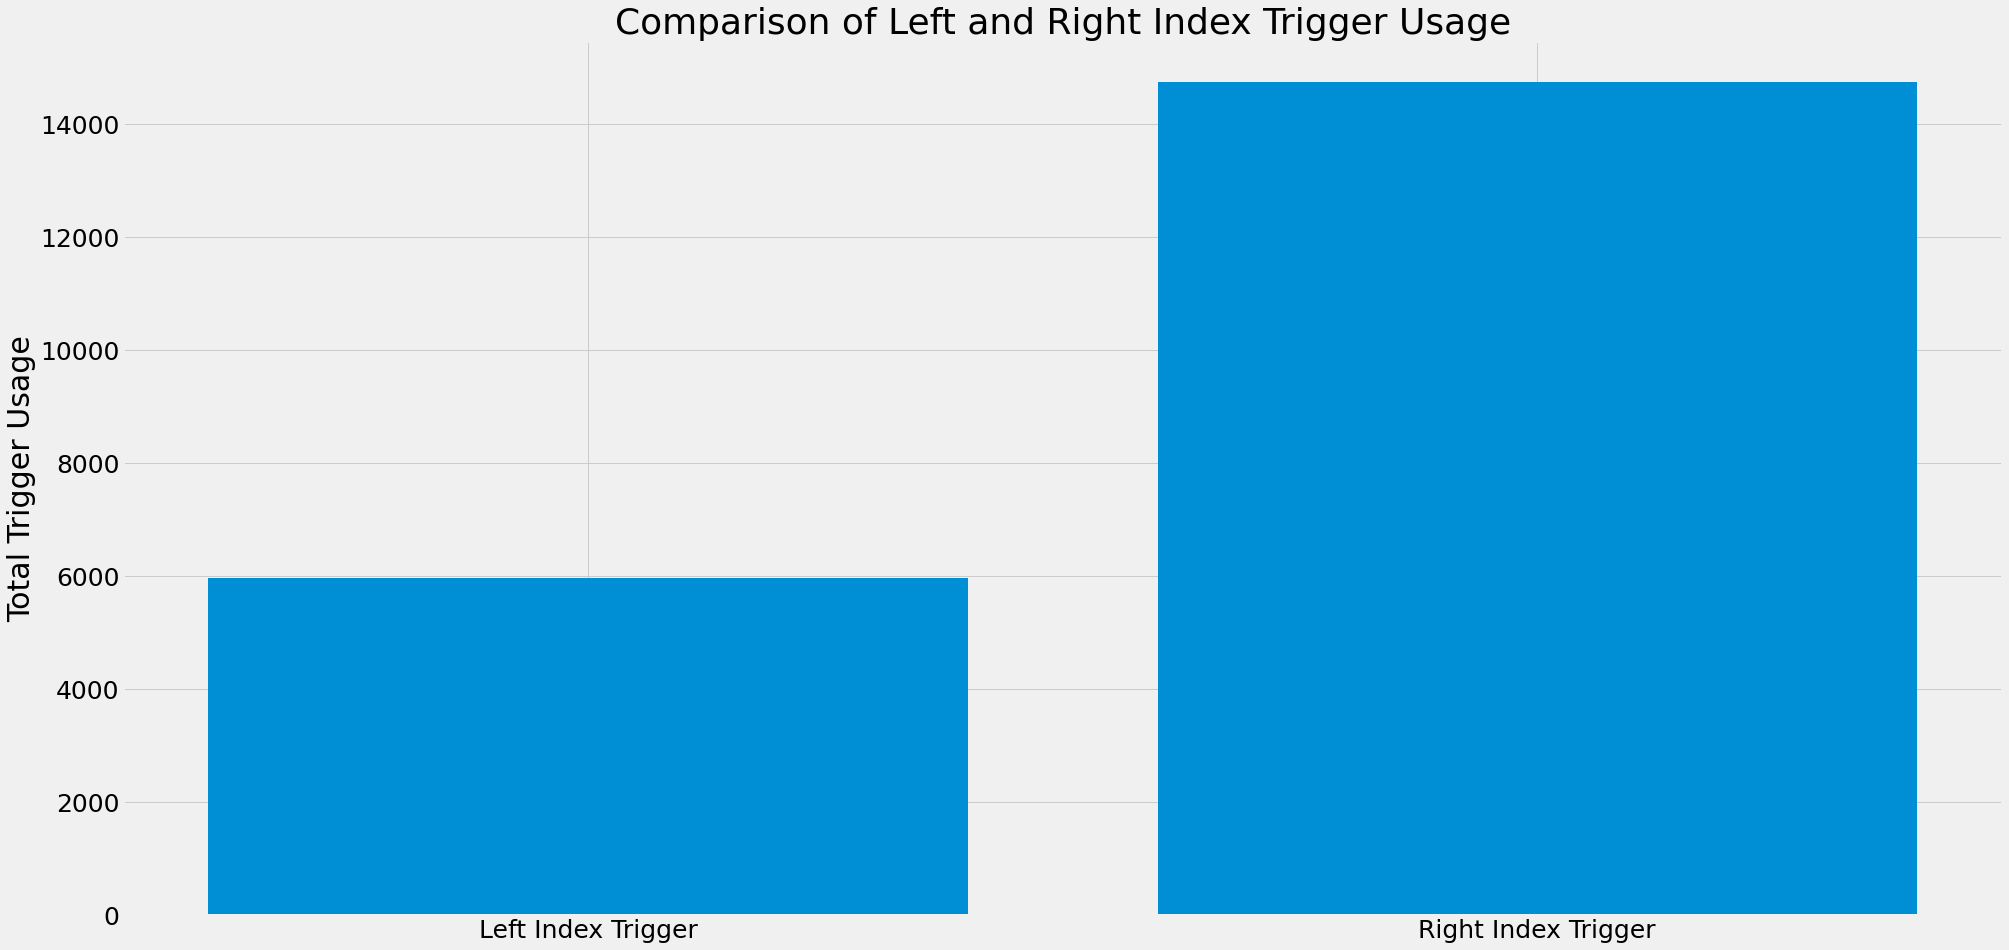

In [11]:
def compare_trigger_Index_usage(df):
    """
    Compares the usage of left and right Index triggers.
    """
    left_usage = df['LeftIndexTrigger'].sum()
    right_usage = df['RightIndexTrigger'].sum()

    # Plotting
    plt.figure(figsize=(30, 15))
    plt.bar(['Left Index Trigger', 'Right Index Trigger'], [left_usage, right_usage])
    plt.ylabel('Total Trigger Usage')
    plt.title('Comparison of Left and Right Index Trigger Usage')
    plt.show()

compare_trigger_Index_usage(df)

#### 1.5.1.3. Left and Right Hand triggers Usage (Participant)

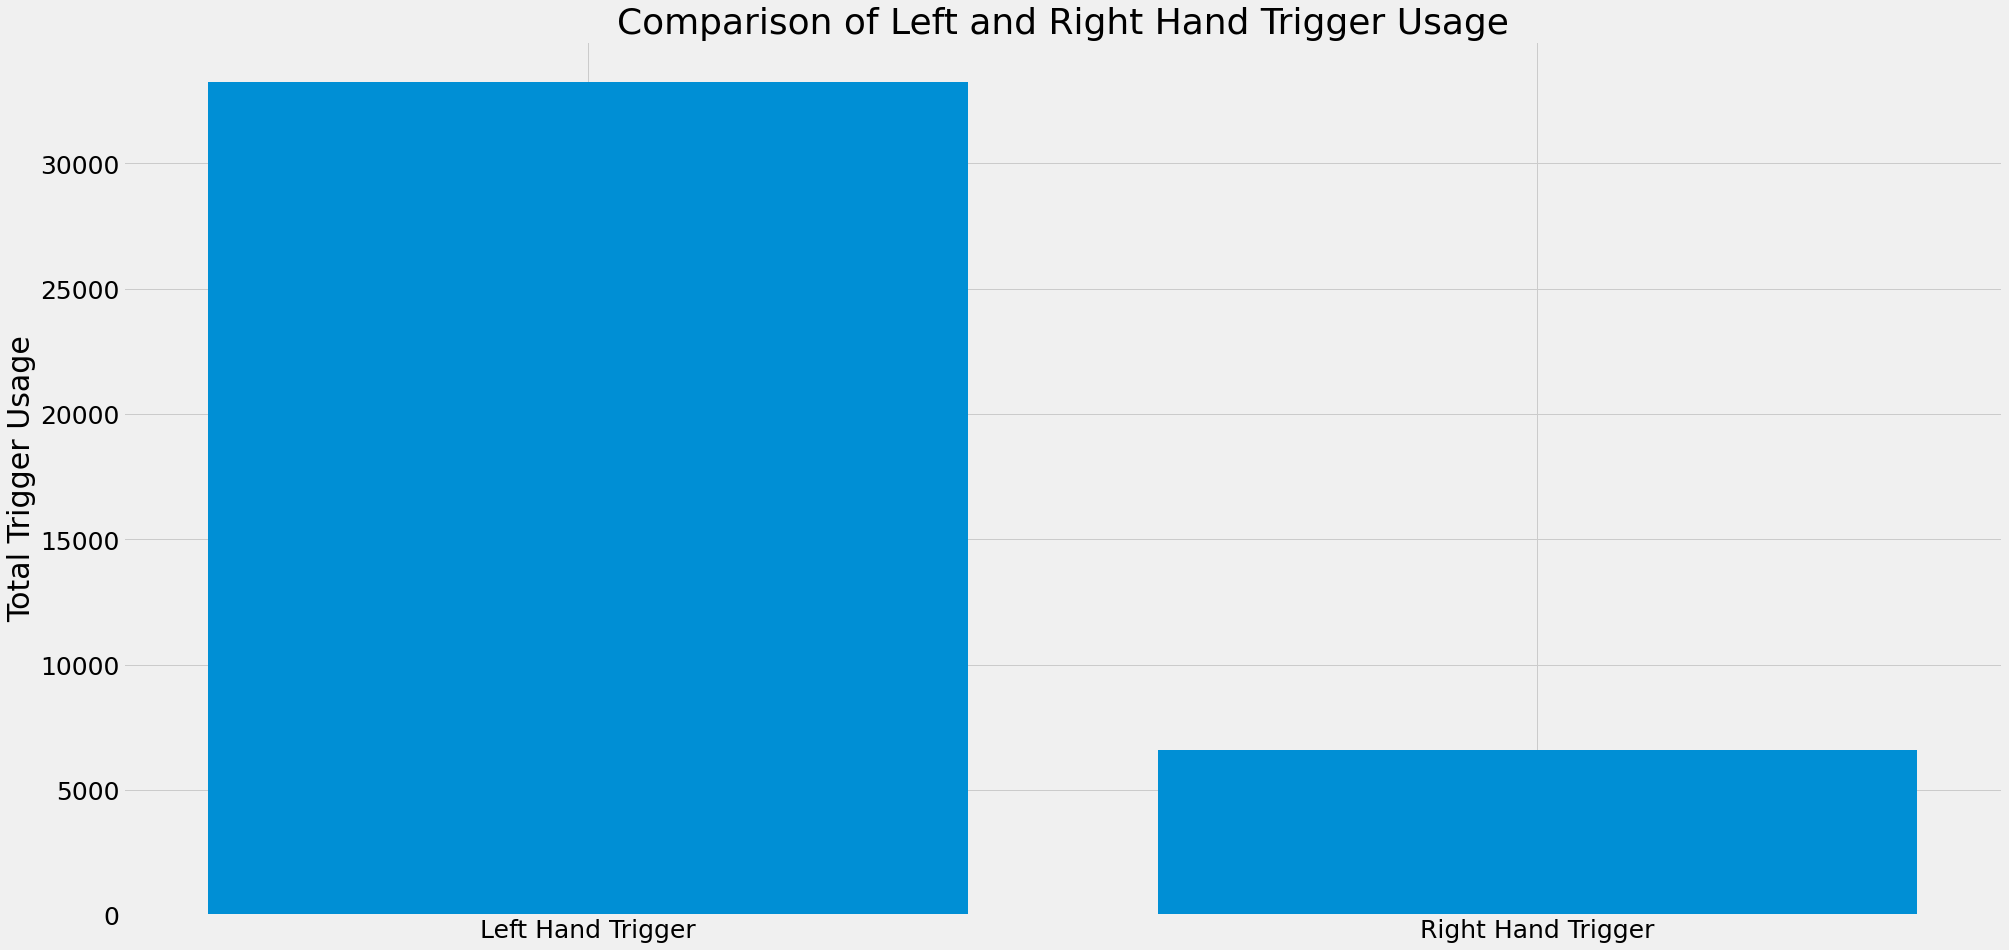

In [12]:
def compare_trigger_usage(df):
    """
    Compares the usage of left and right hand triggers.
    """
    left_usage = df['LeftHandTrigger'].sum()
    right_usage = df['RightHandTrigger'].sum()

    # Plotting
    plt.figure(figsize=(30, 15))
    plt.bar(['Left Hand Trigger', 'Right Hand Trigger'], [left_usage, right_usage])
    plt.ylabel('Total Trigger Usage')
    plt.title('Comparison of Left and Right Hand Trigger Usage')
    plt.show()

compare_trigger_usage(df)

#### 1.5.1.4. Comparison (All Participants)

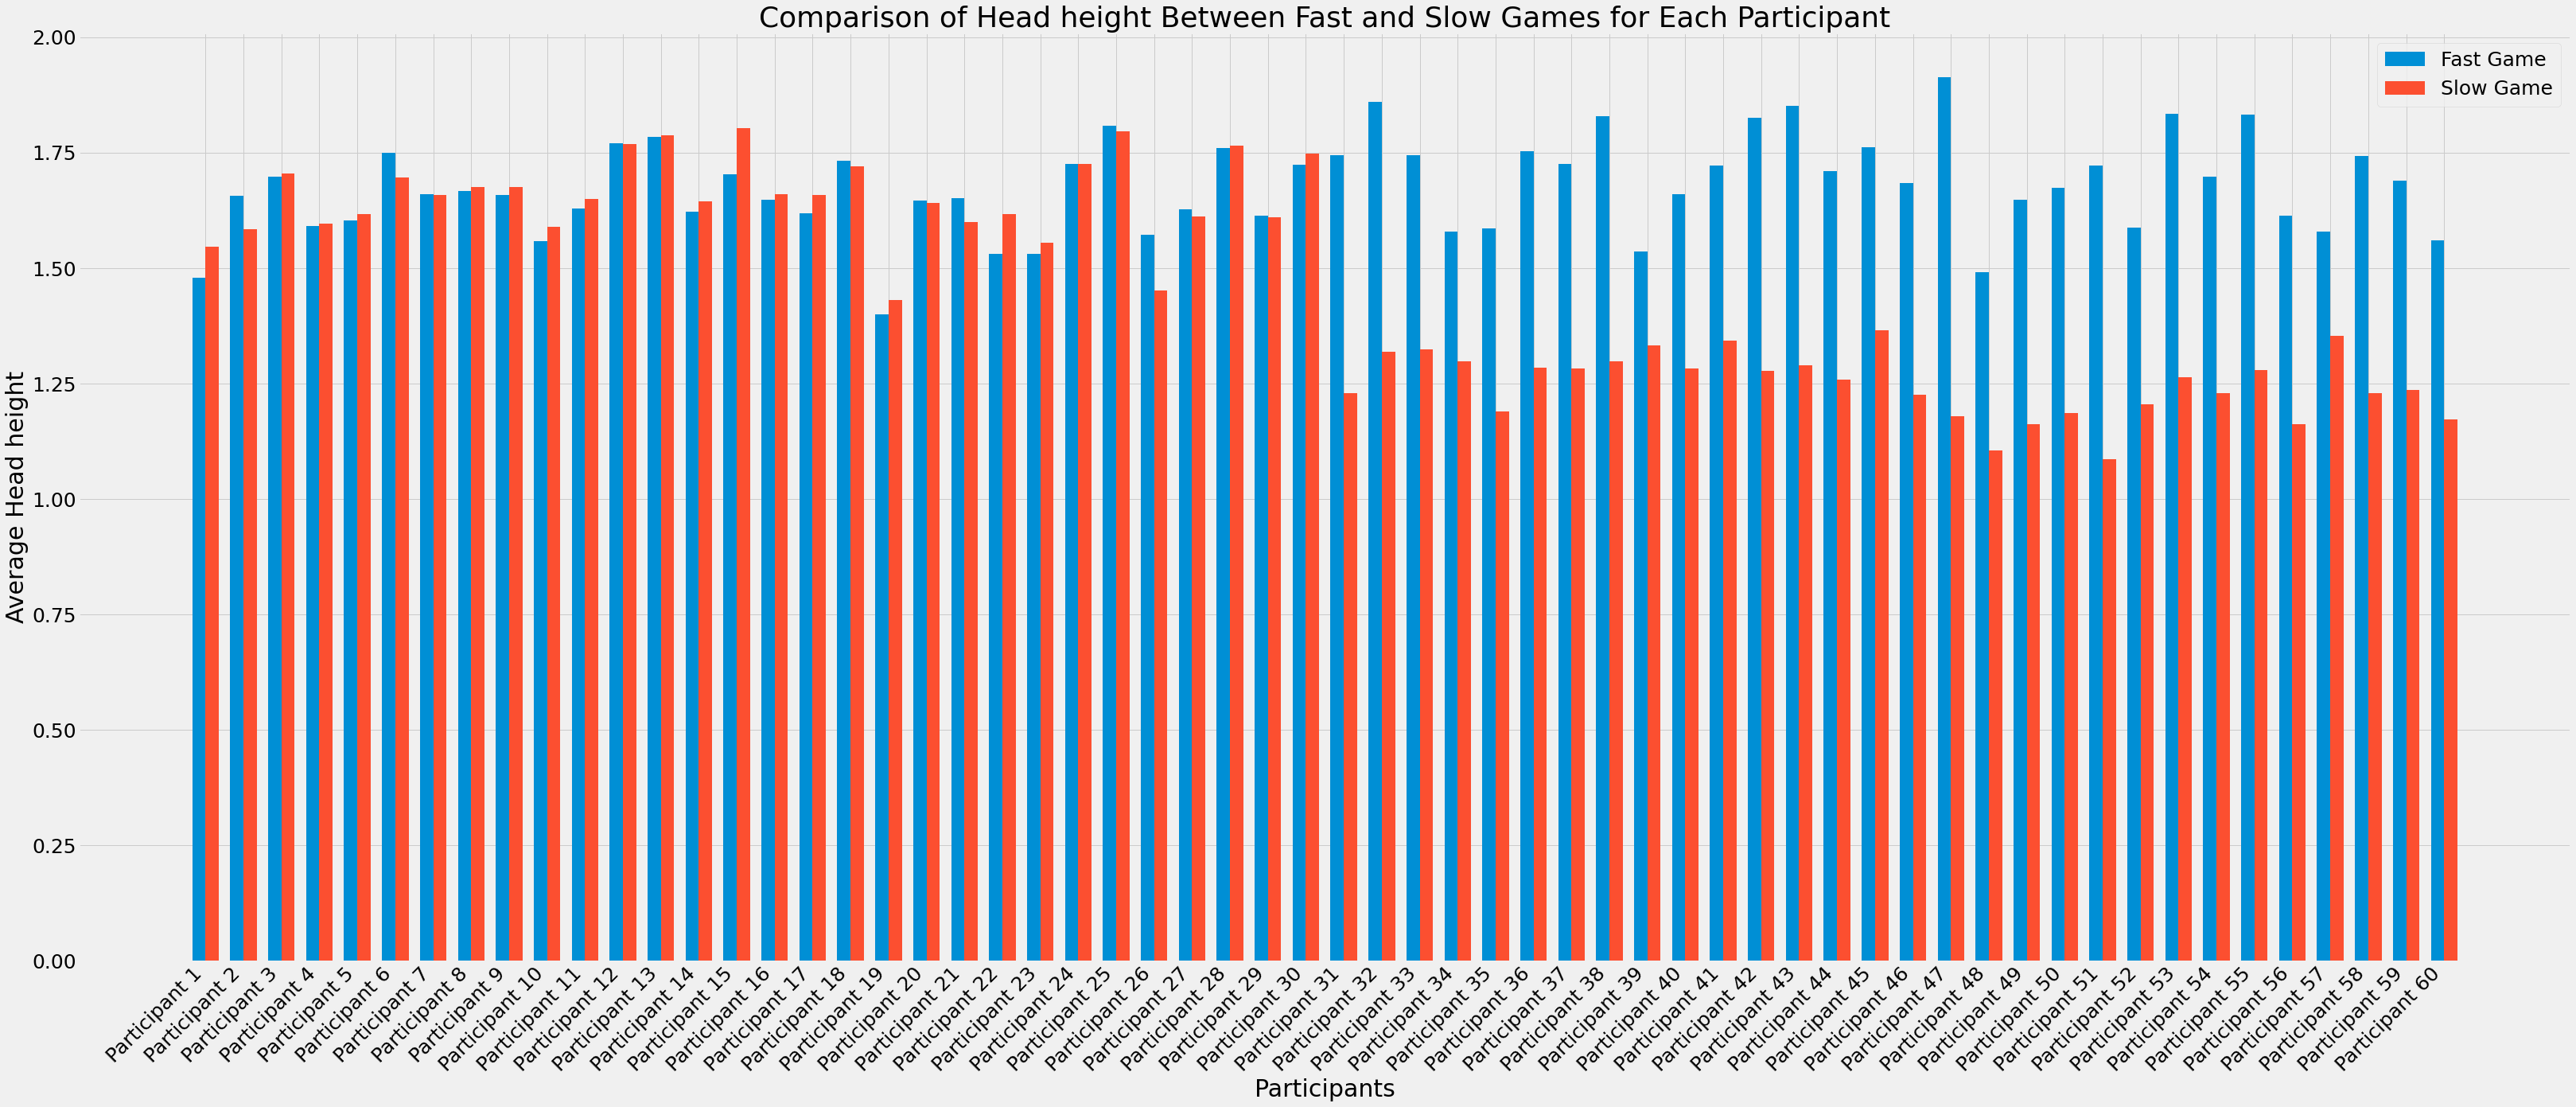

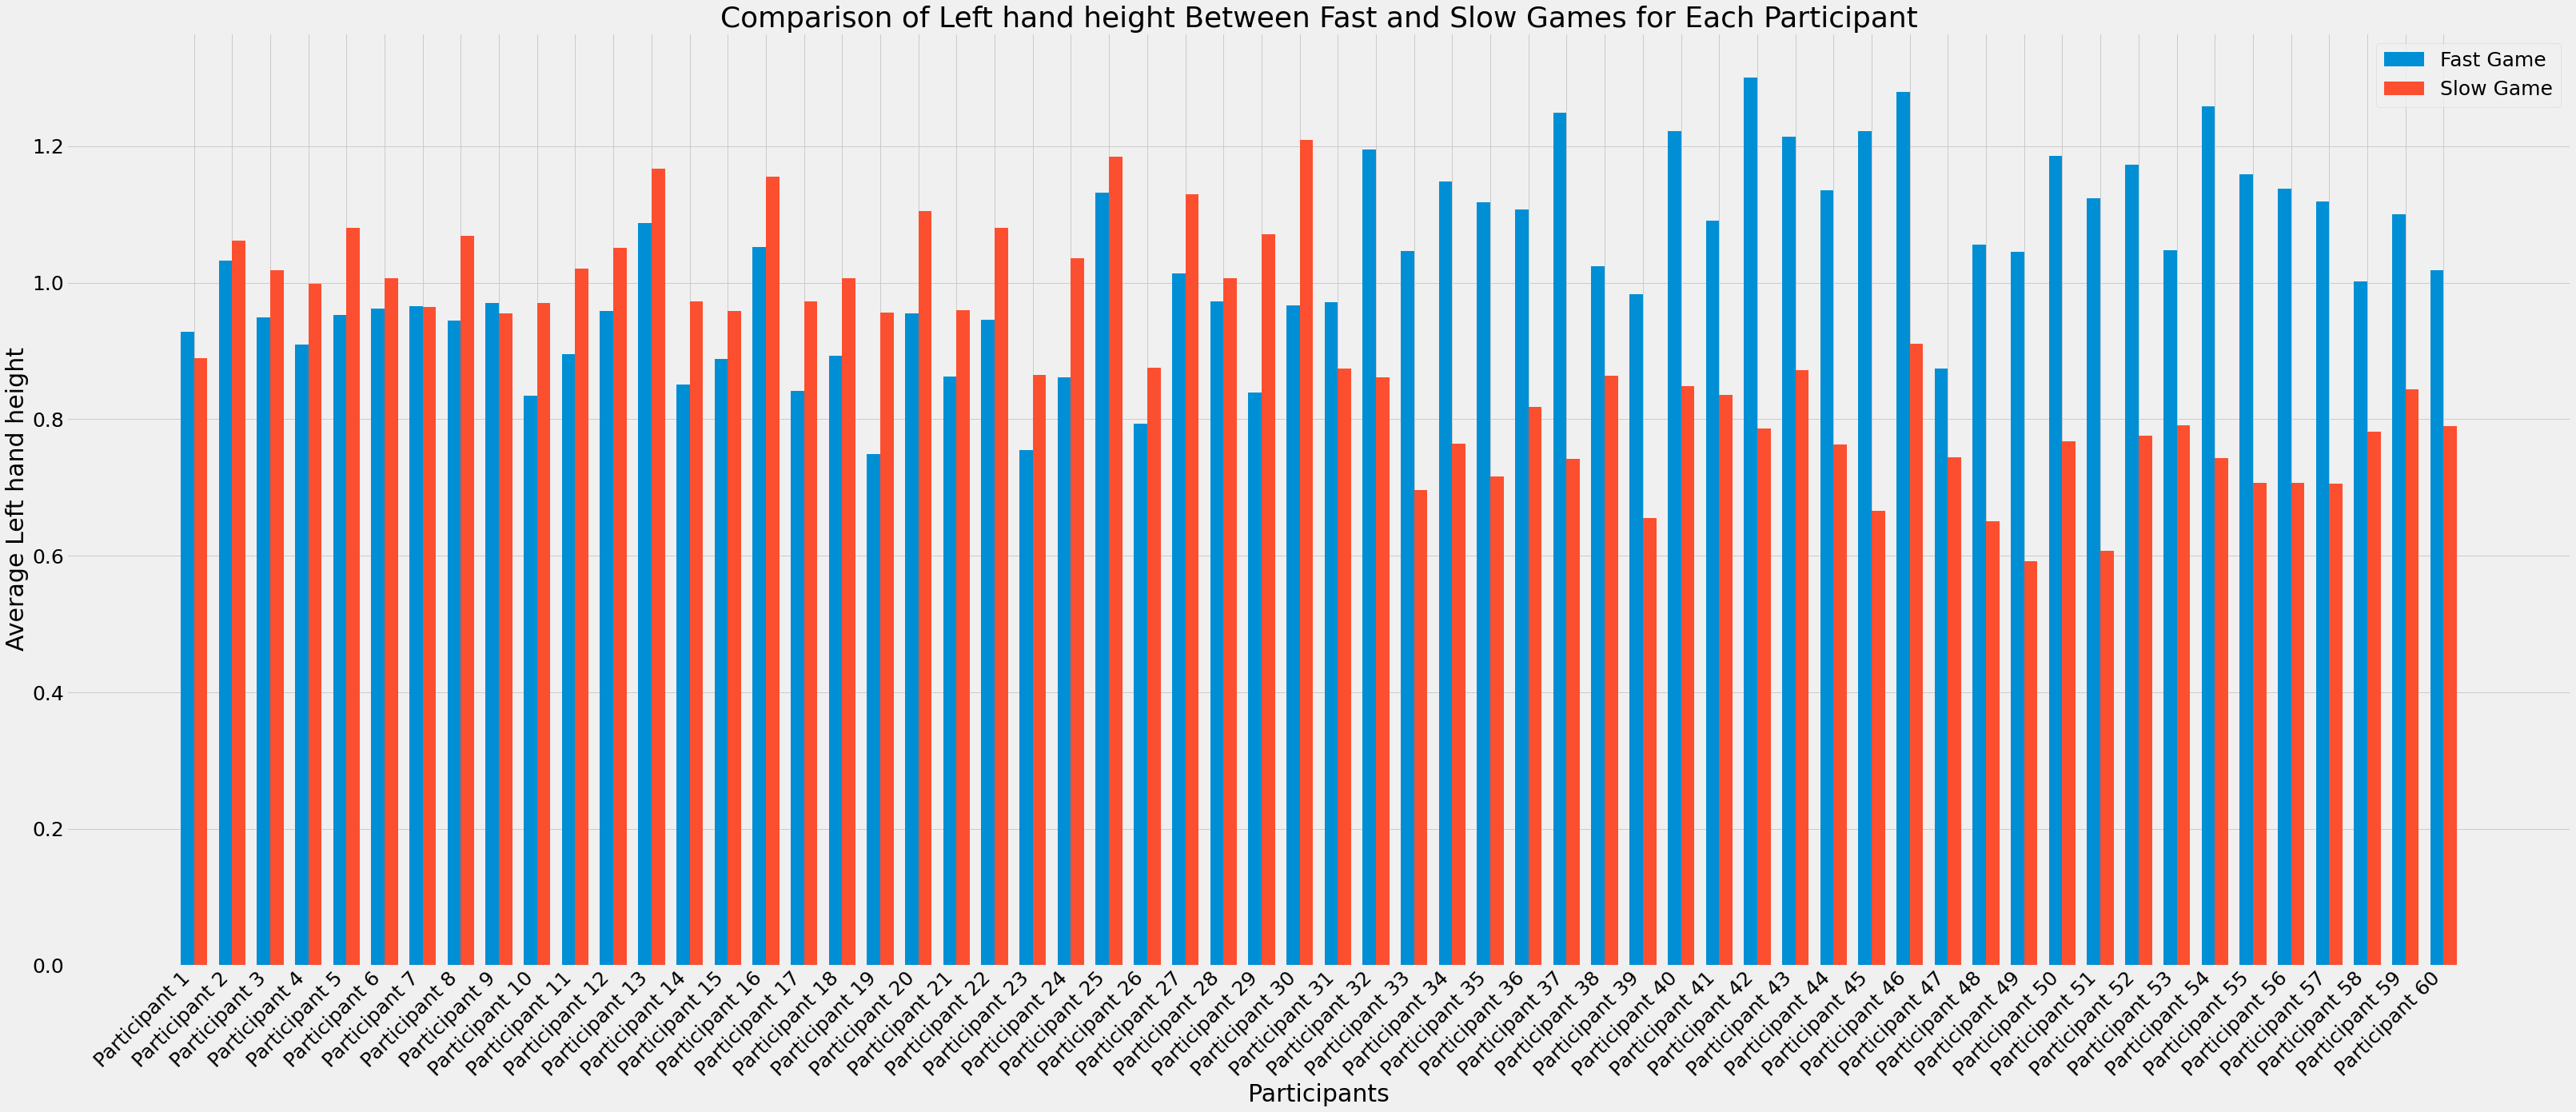

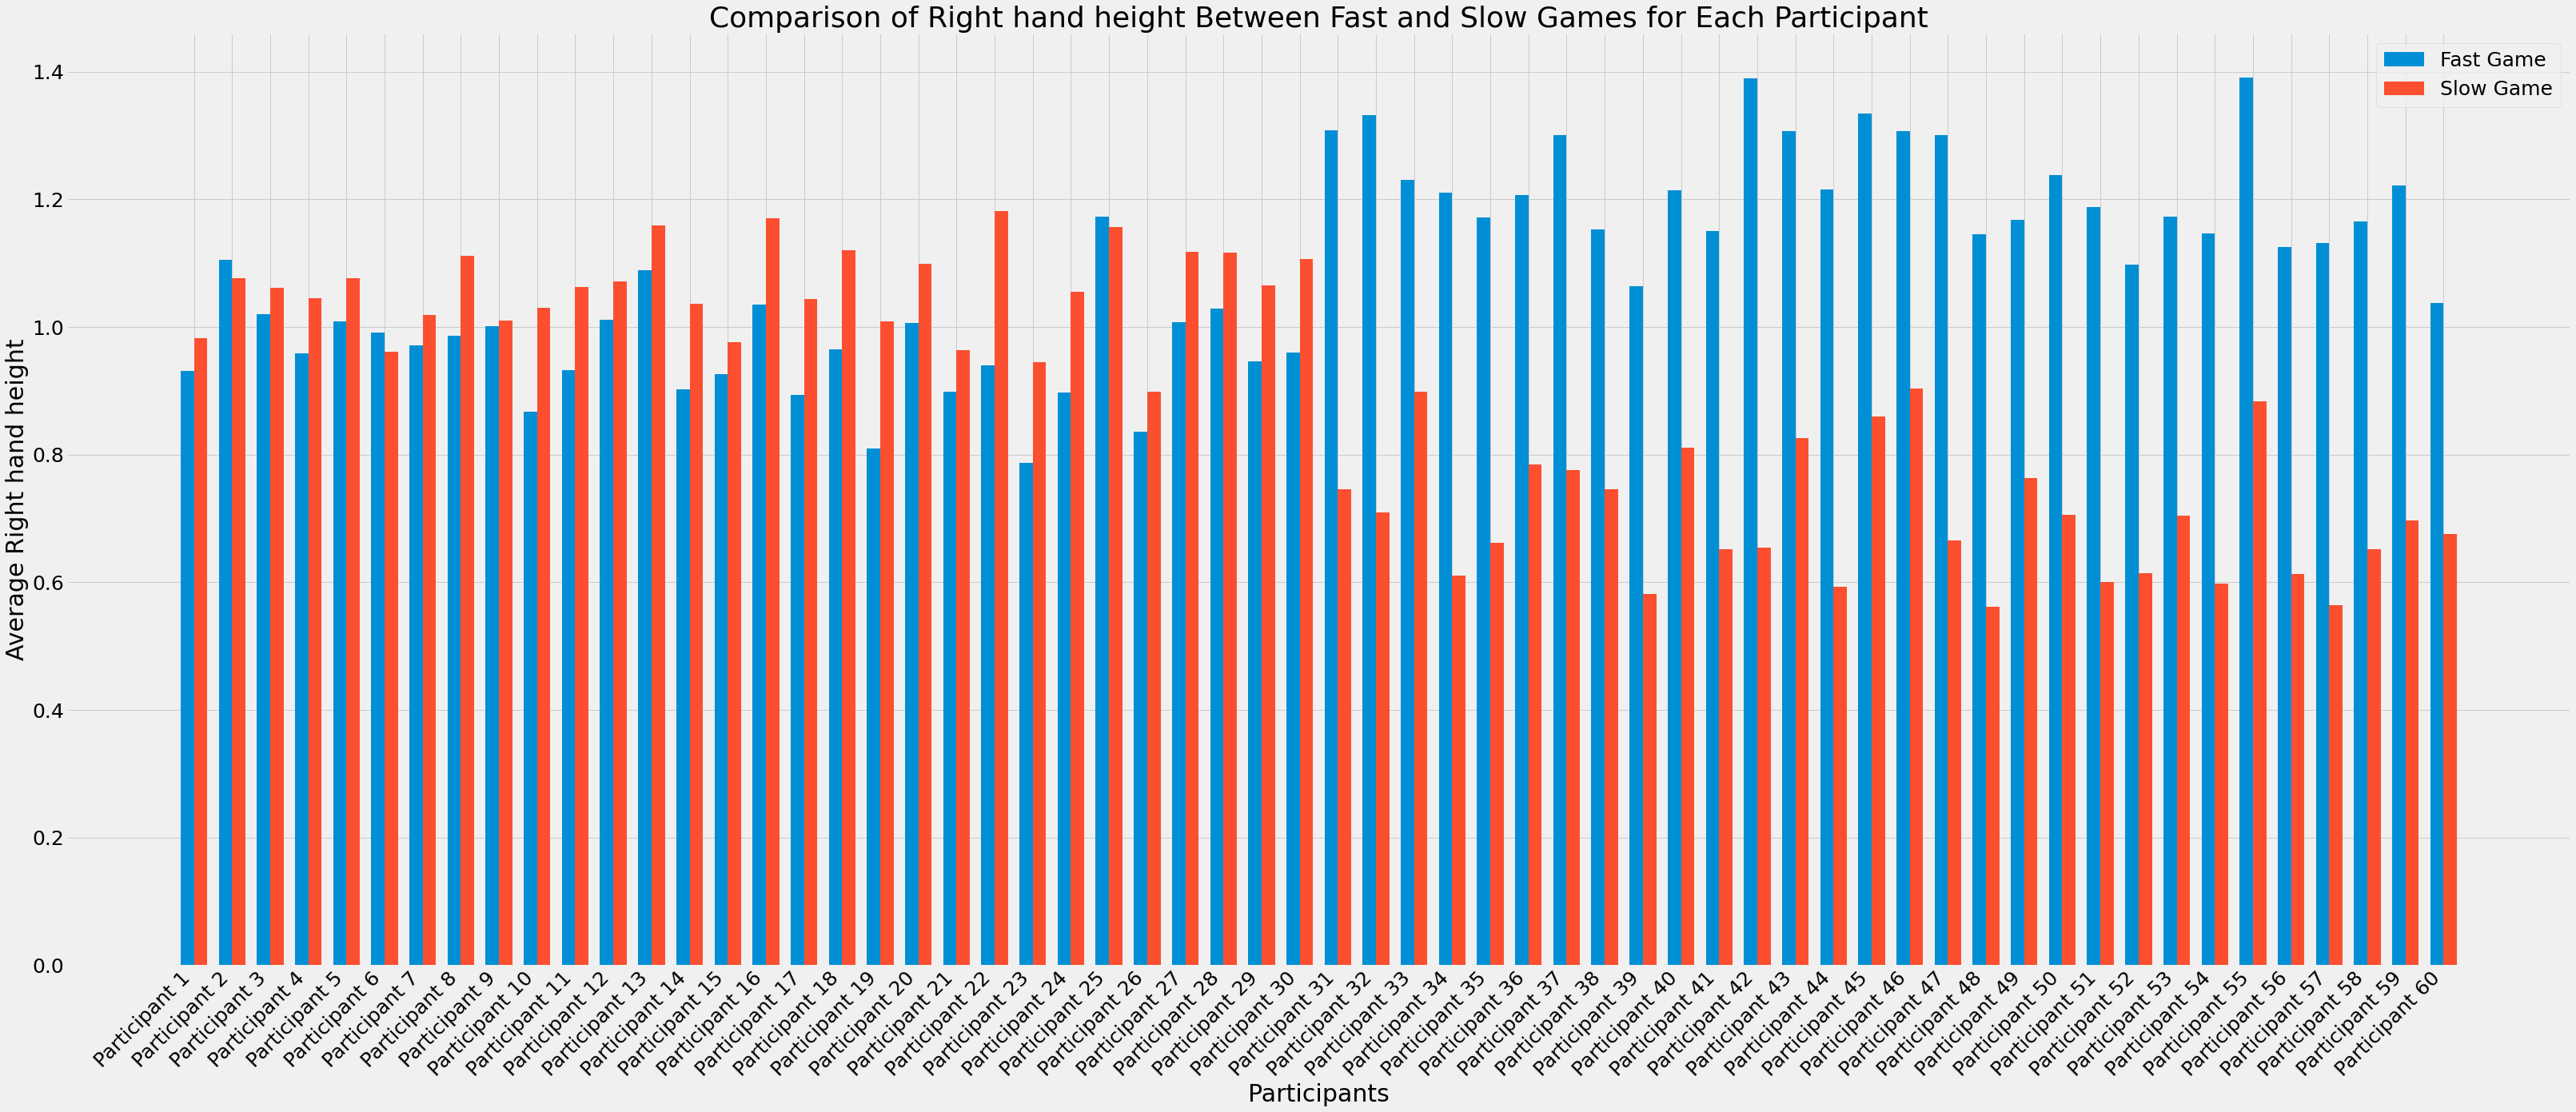

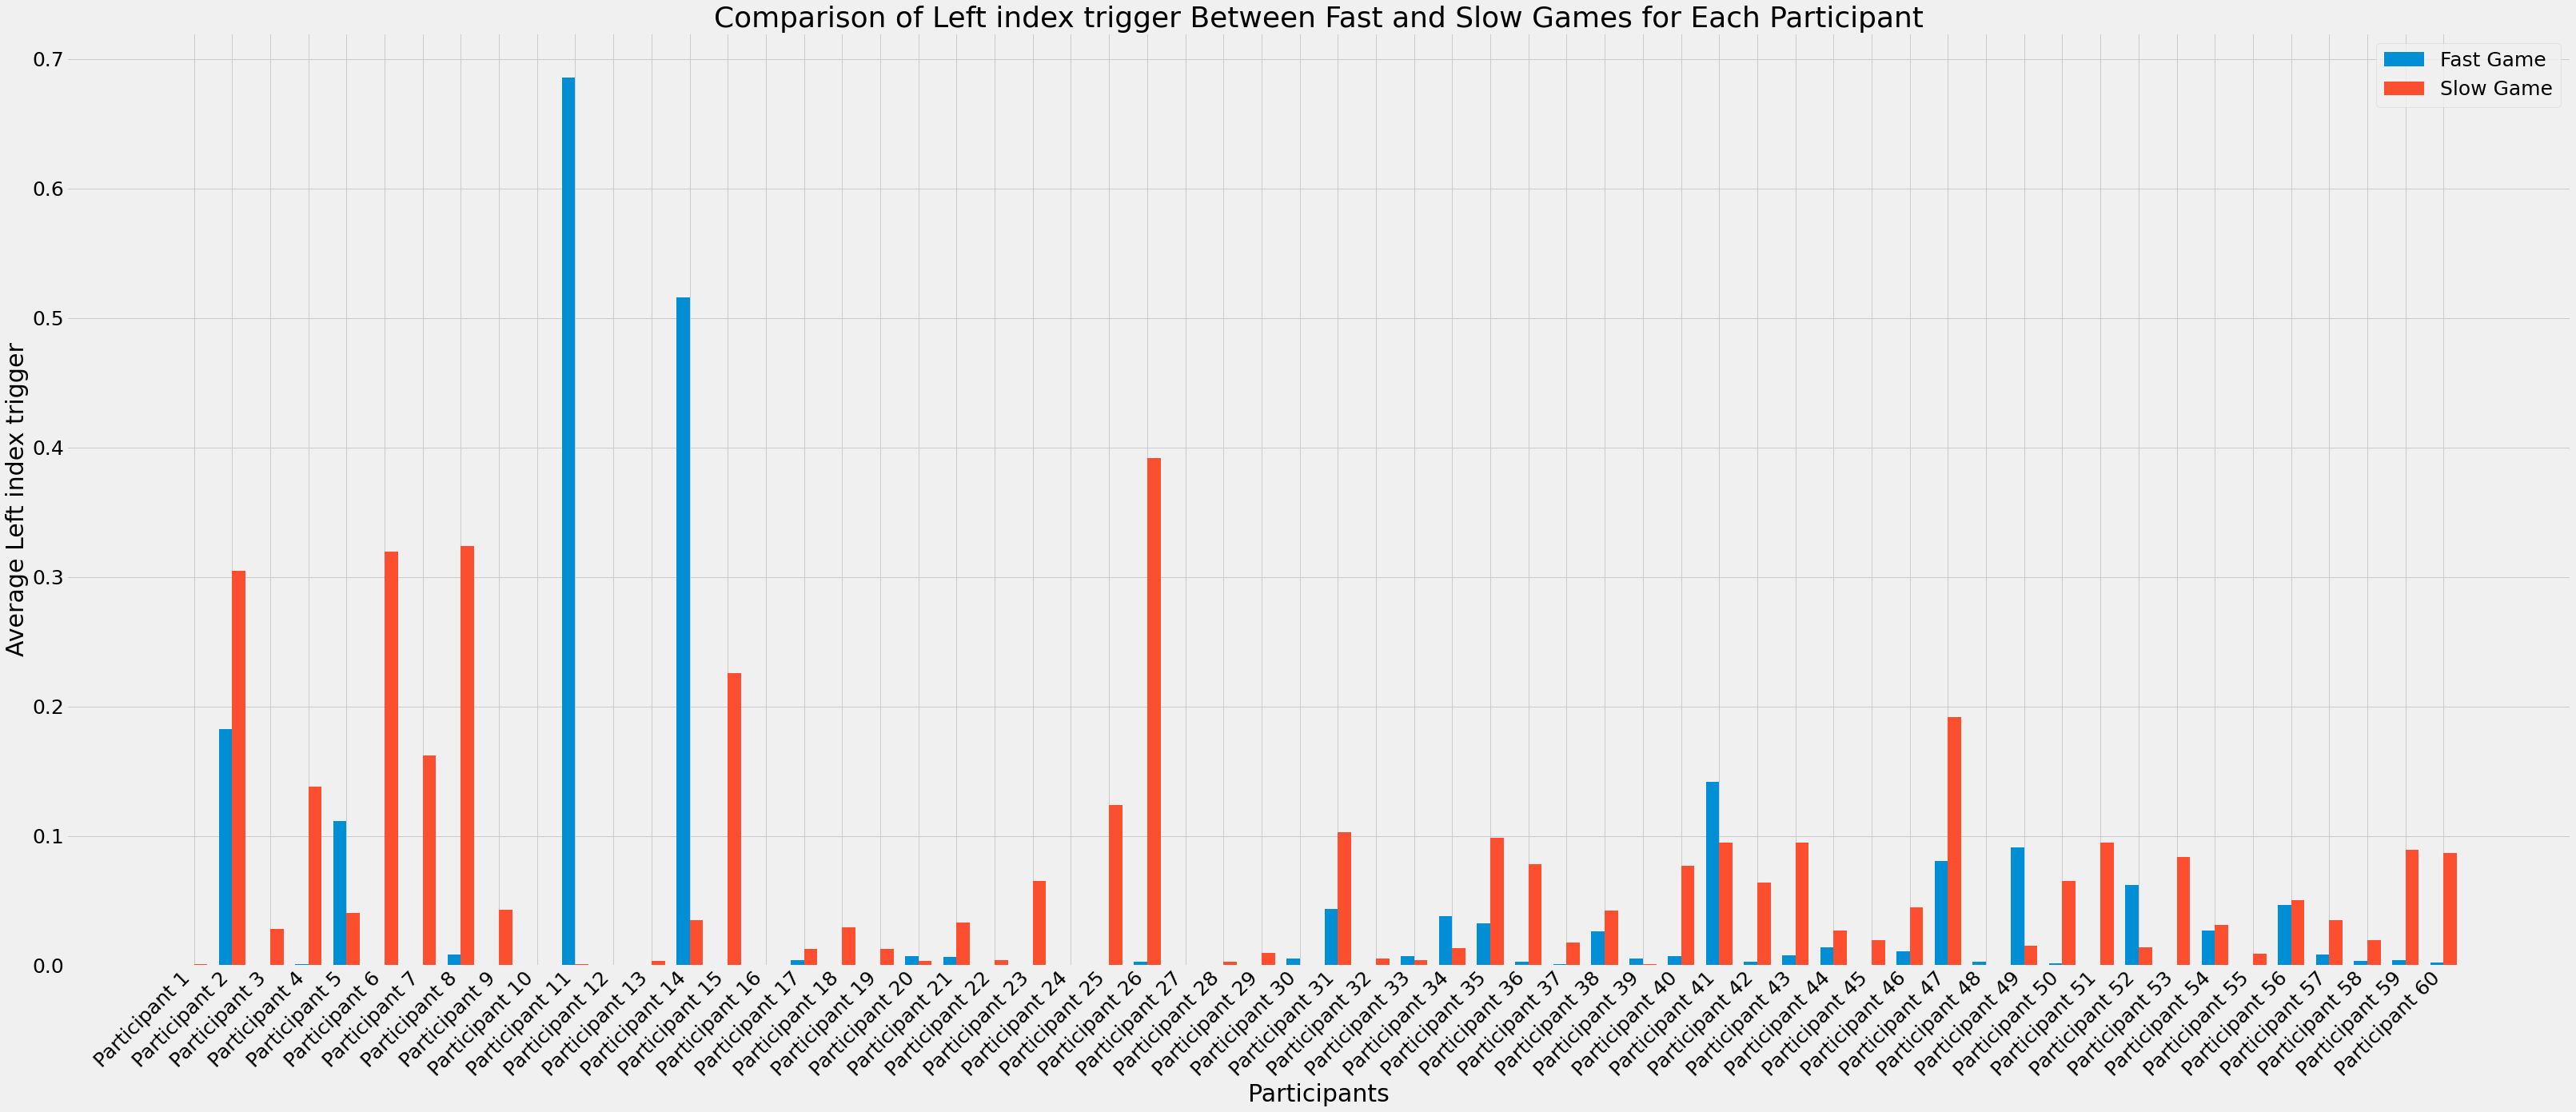

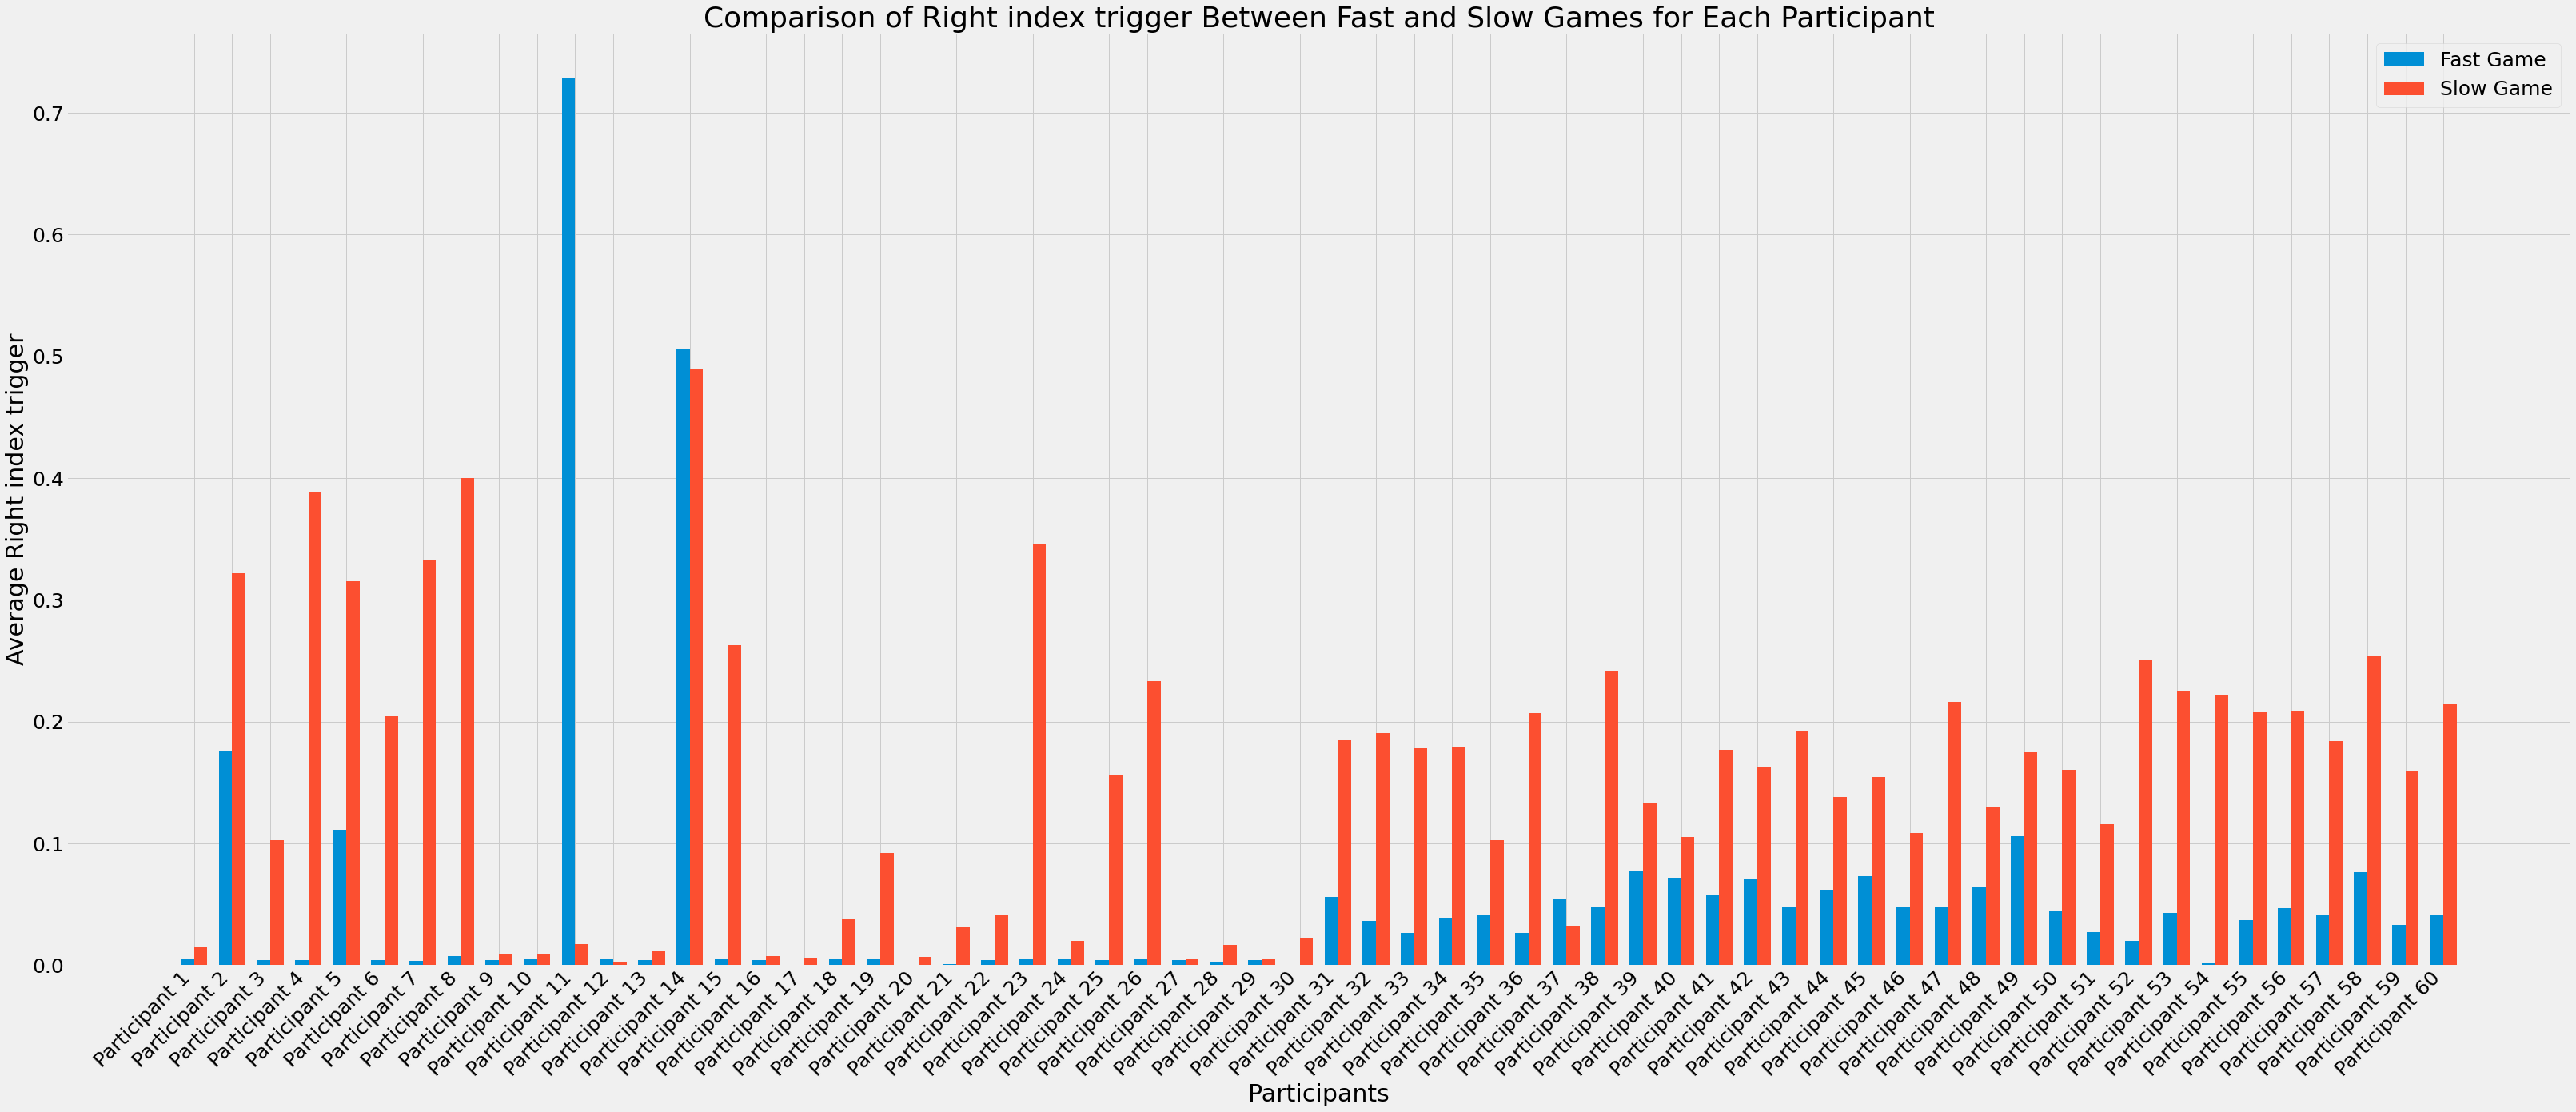

In [34]:
session = {}
for i in movement_data:
    df = pd.read_csv(i)
    idx = i.split('/')
    game = 'fast' if 'fast' in idx[-1] else 'slow'
    participant_id = 'Participant_' + str(participant_dict[idx[4]])
    avg_head_height = df['HeadPosY'].mean()
    avg_left_hand_height = df['LeftTouchPosY'].mean()
    avg_right_hand_height = df['RightTouchPosY'].mean()
    avg_left_index_trigger = df['LeftIndexTrigger'].mean()
    avg_right_index_trigger = df['RightIndexTrigger'].mean()
    session[participant_id + '_' + game] = {
        'head_height': avg_head_height,
        'left_hand_height': avg_left_hand_height,
        'right_hand_height': avg_right_hand_height,
        'left_index_trigger': avg_left_index_trigger,
        'right_index_trigger': avg_right_index_trigger
    }

# Prepare data for plotting
participants = list(participant_dict.values())  # List of participant numbers
metrics = ['head_height', 'left_hand_height', 'right_hand_height', 'left_index_trigger', 'right_index_trigger']
metric_values_fast = {metric: [session[f'Participant_{p}_fast'][metric] for p in participants] for metric in metrics}
metric_values_slow = {metric: [session[f'Participant_{p}_slow'][metric] for p in participants] for metric in metrics}
for metric in metrics:
    fig, ax = plt.subplots(figsize=(50, 20))
    bar_width = 0.35
    index = range(len(participants))
    fast_values = metric_values_fast[metric]
    slow_values = metric_values_slow[metric]

    bars1 = ax.bar(index, fast_values, bar_width, label='Fast Game')
    bars2 = ax.bar([i + bar_width for i in index], slow_values, bar_width, label='Slow Game')
    ax.set_xlabel('Participants')
    ax.set_ylabel(f'Average {metric.replace("_", " ").capitalize()}')
    ax.set_title(f'Comparison of {metric.replace("_", " ").capitalize()} Between Fast and Slow Games for Each Participant')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels([f'Participant {p}' for p in participants], rotation=45, ha='right')
    ax.legend()

In the first group, where participants played Beat Saber and Cooking Simulator, the average  height (Y position) remained similar because both games involve standing and minimal vertical movement. However, in the second group, where participants played Forklift Simulator and Medal of Honor, there was a significant gap in height. This is likely due to the nature of the games: Forklift Simulator involves sitting, leading to lower heights, while Medal of Honor requires more dynamic, crouching, or moving actions, causing larger variations in height.

#### 1.5.1.4. Correlation Matrix Of Movement Features ( One Participant )

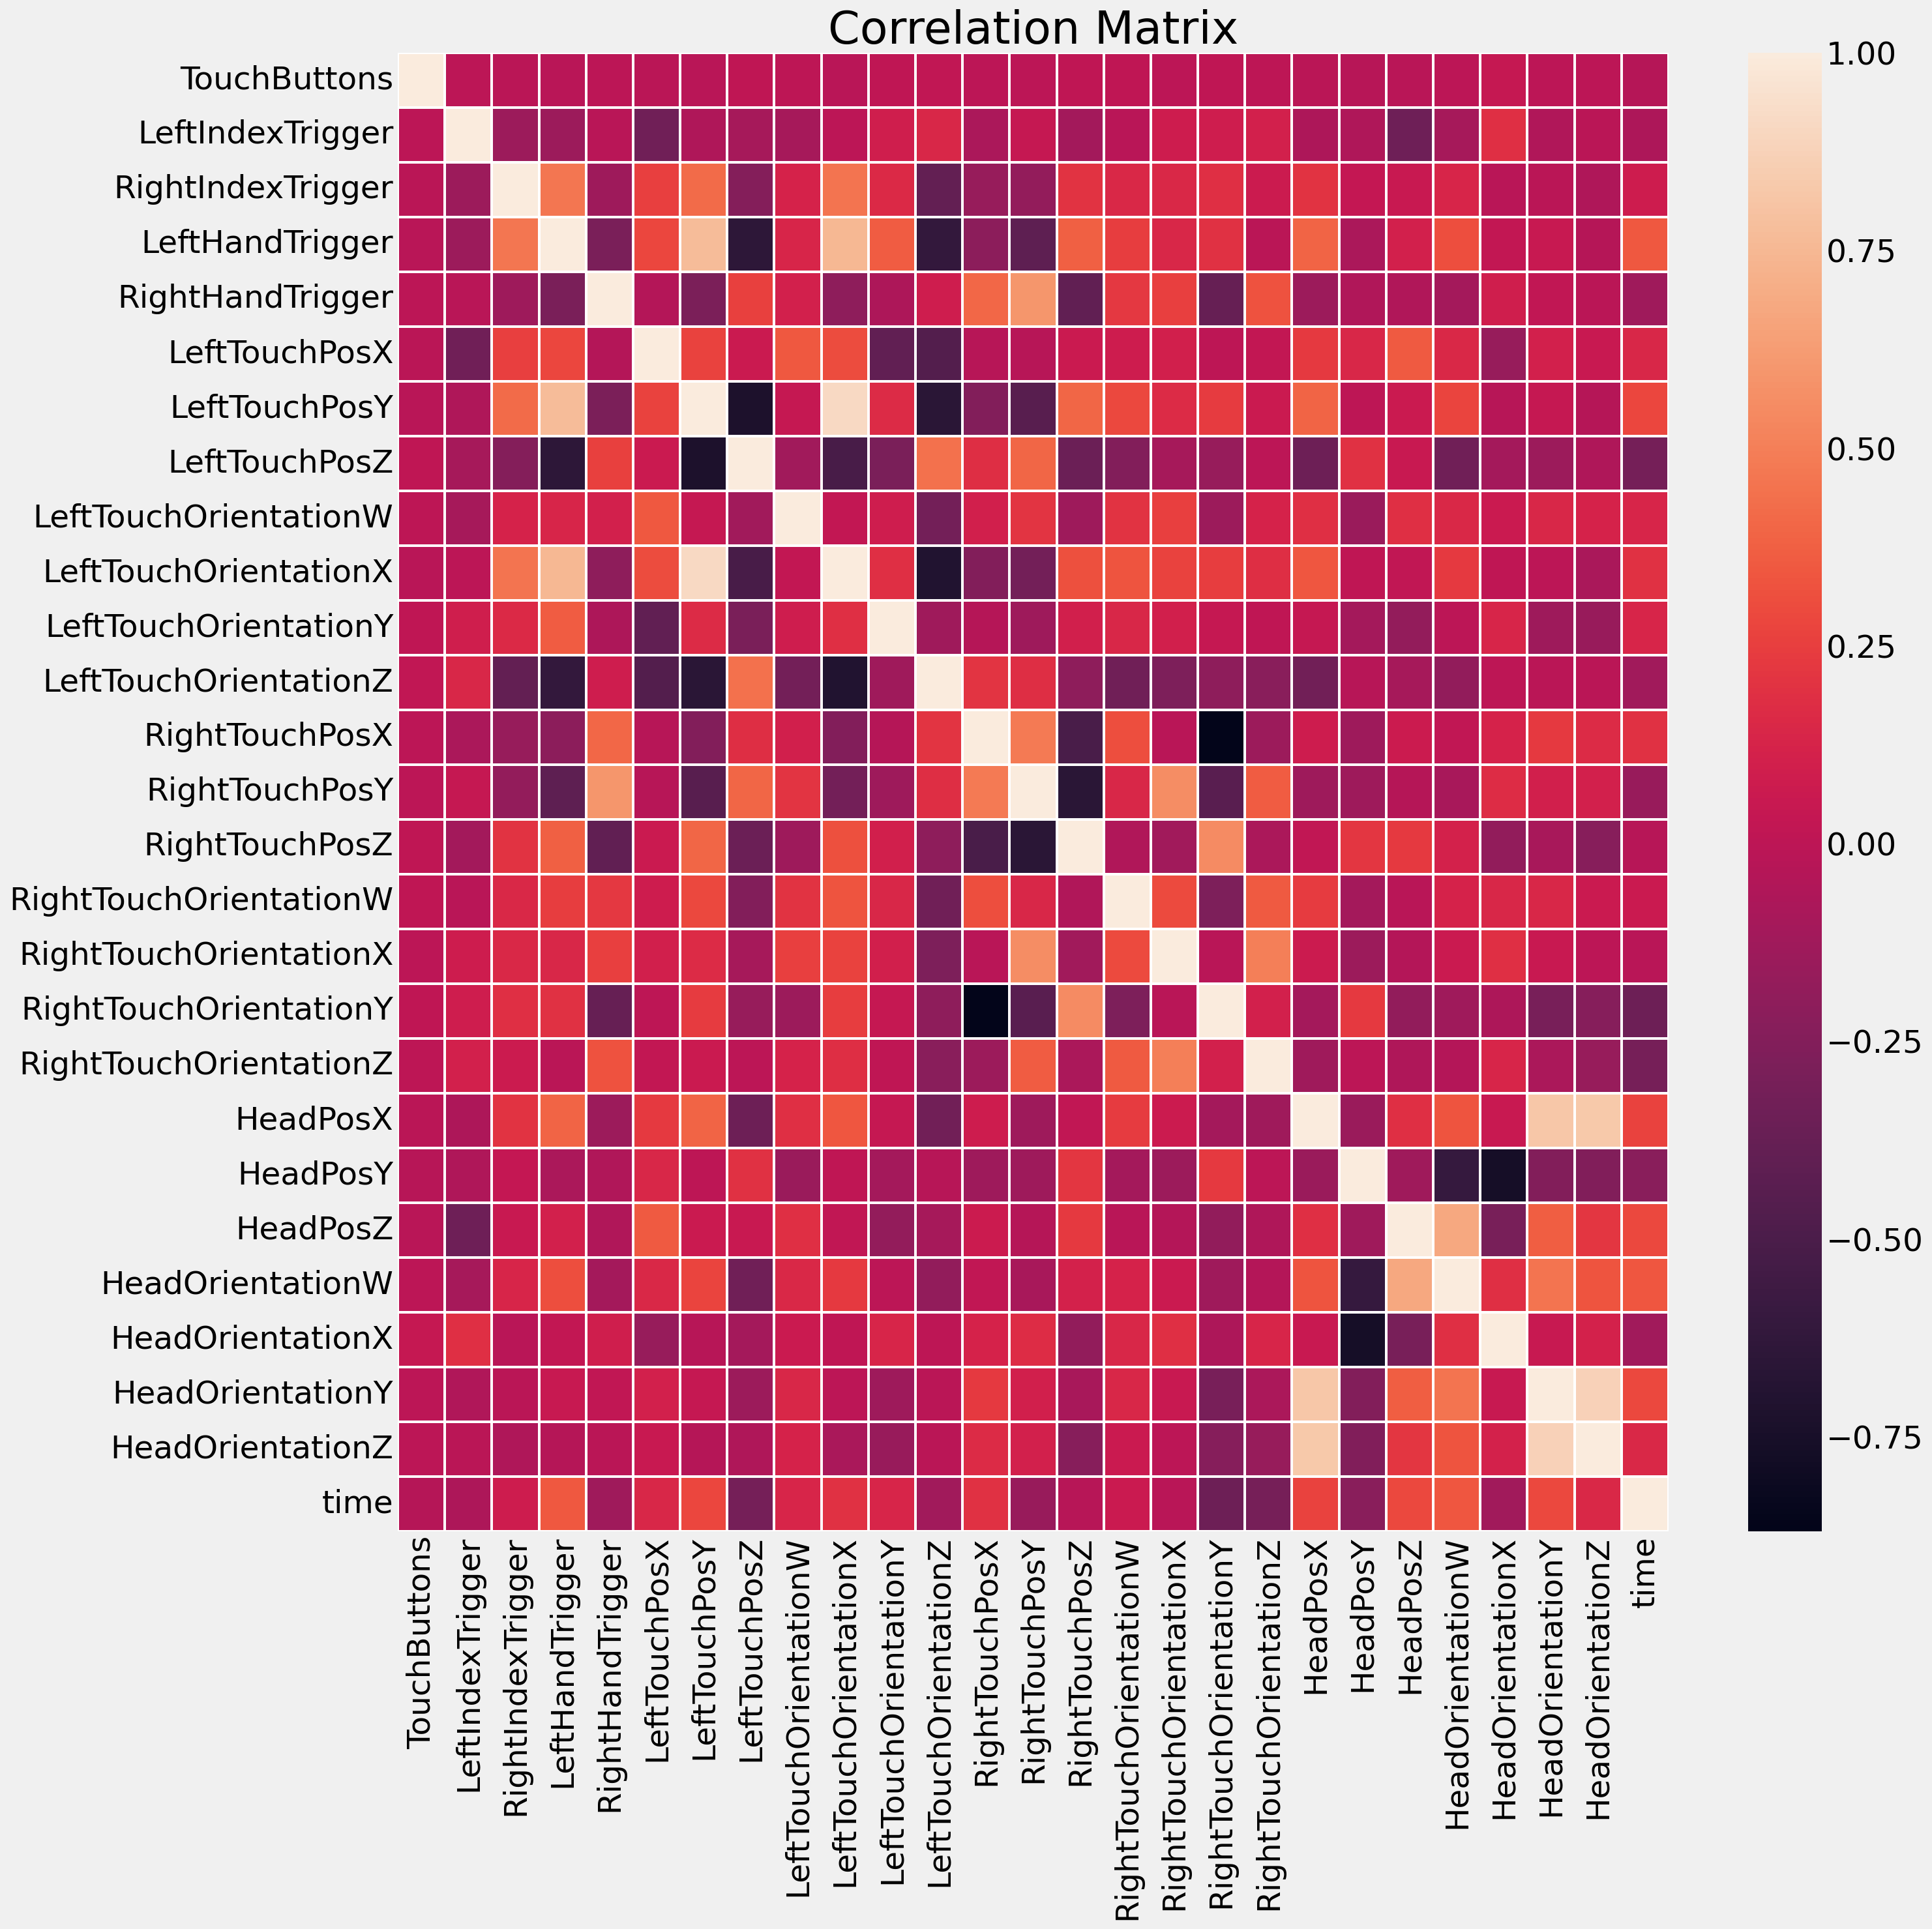

In [15]:
def correlation(df):
    """
    The Correlation Matrix of Features
    """
    plt.figure(figsize=(20,20), dpi=140)
    sns.heatmap(df.corr(), linewidth = 2)
    plt.title("Correlation Matrix")
correlation(df)

### Session Duration per Participant/Game

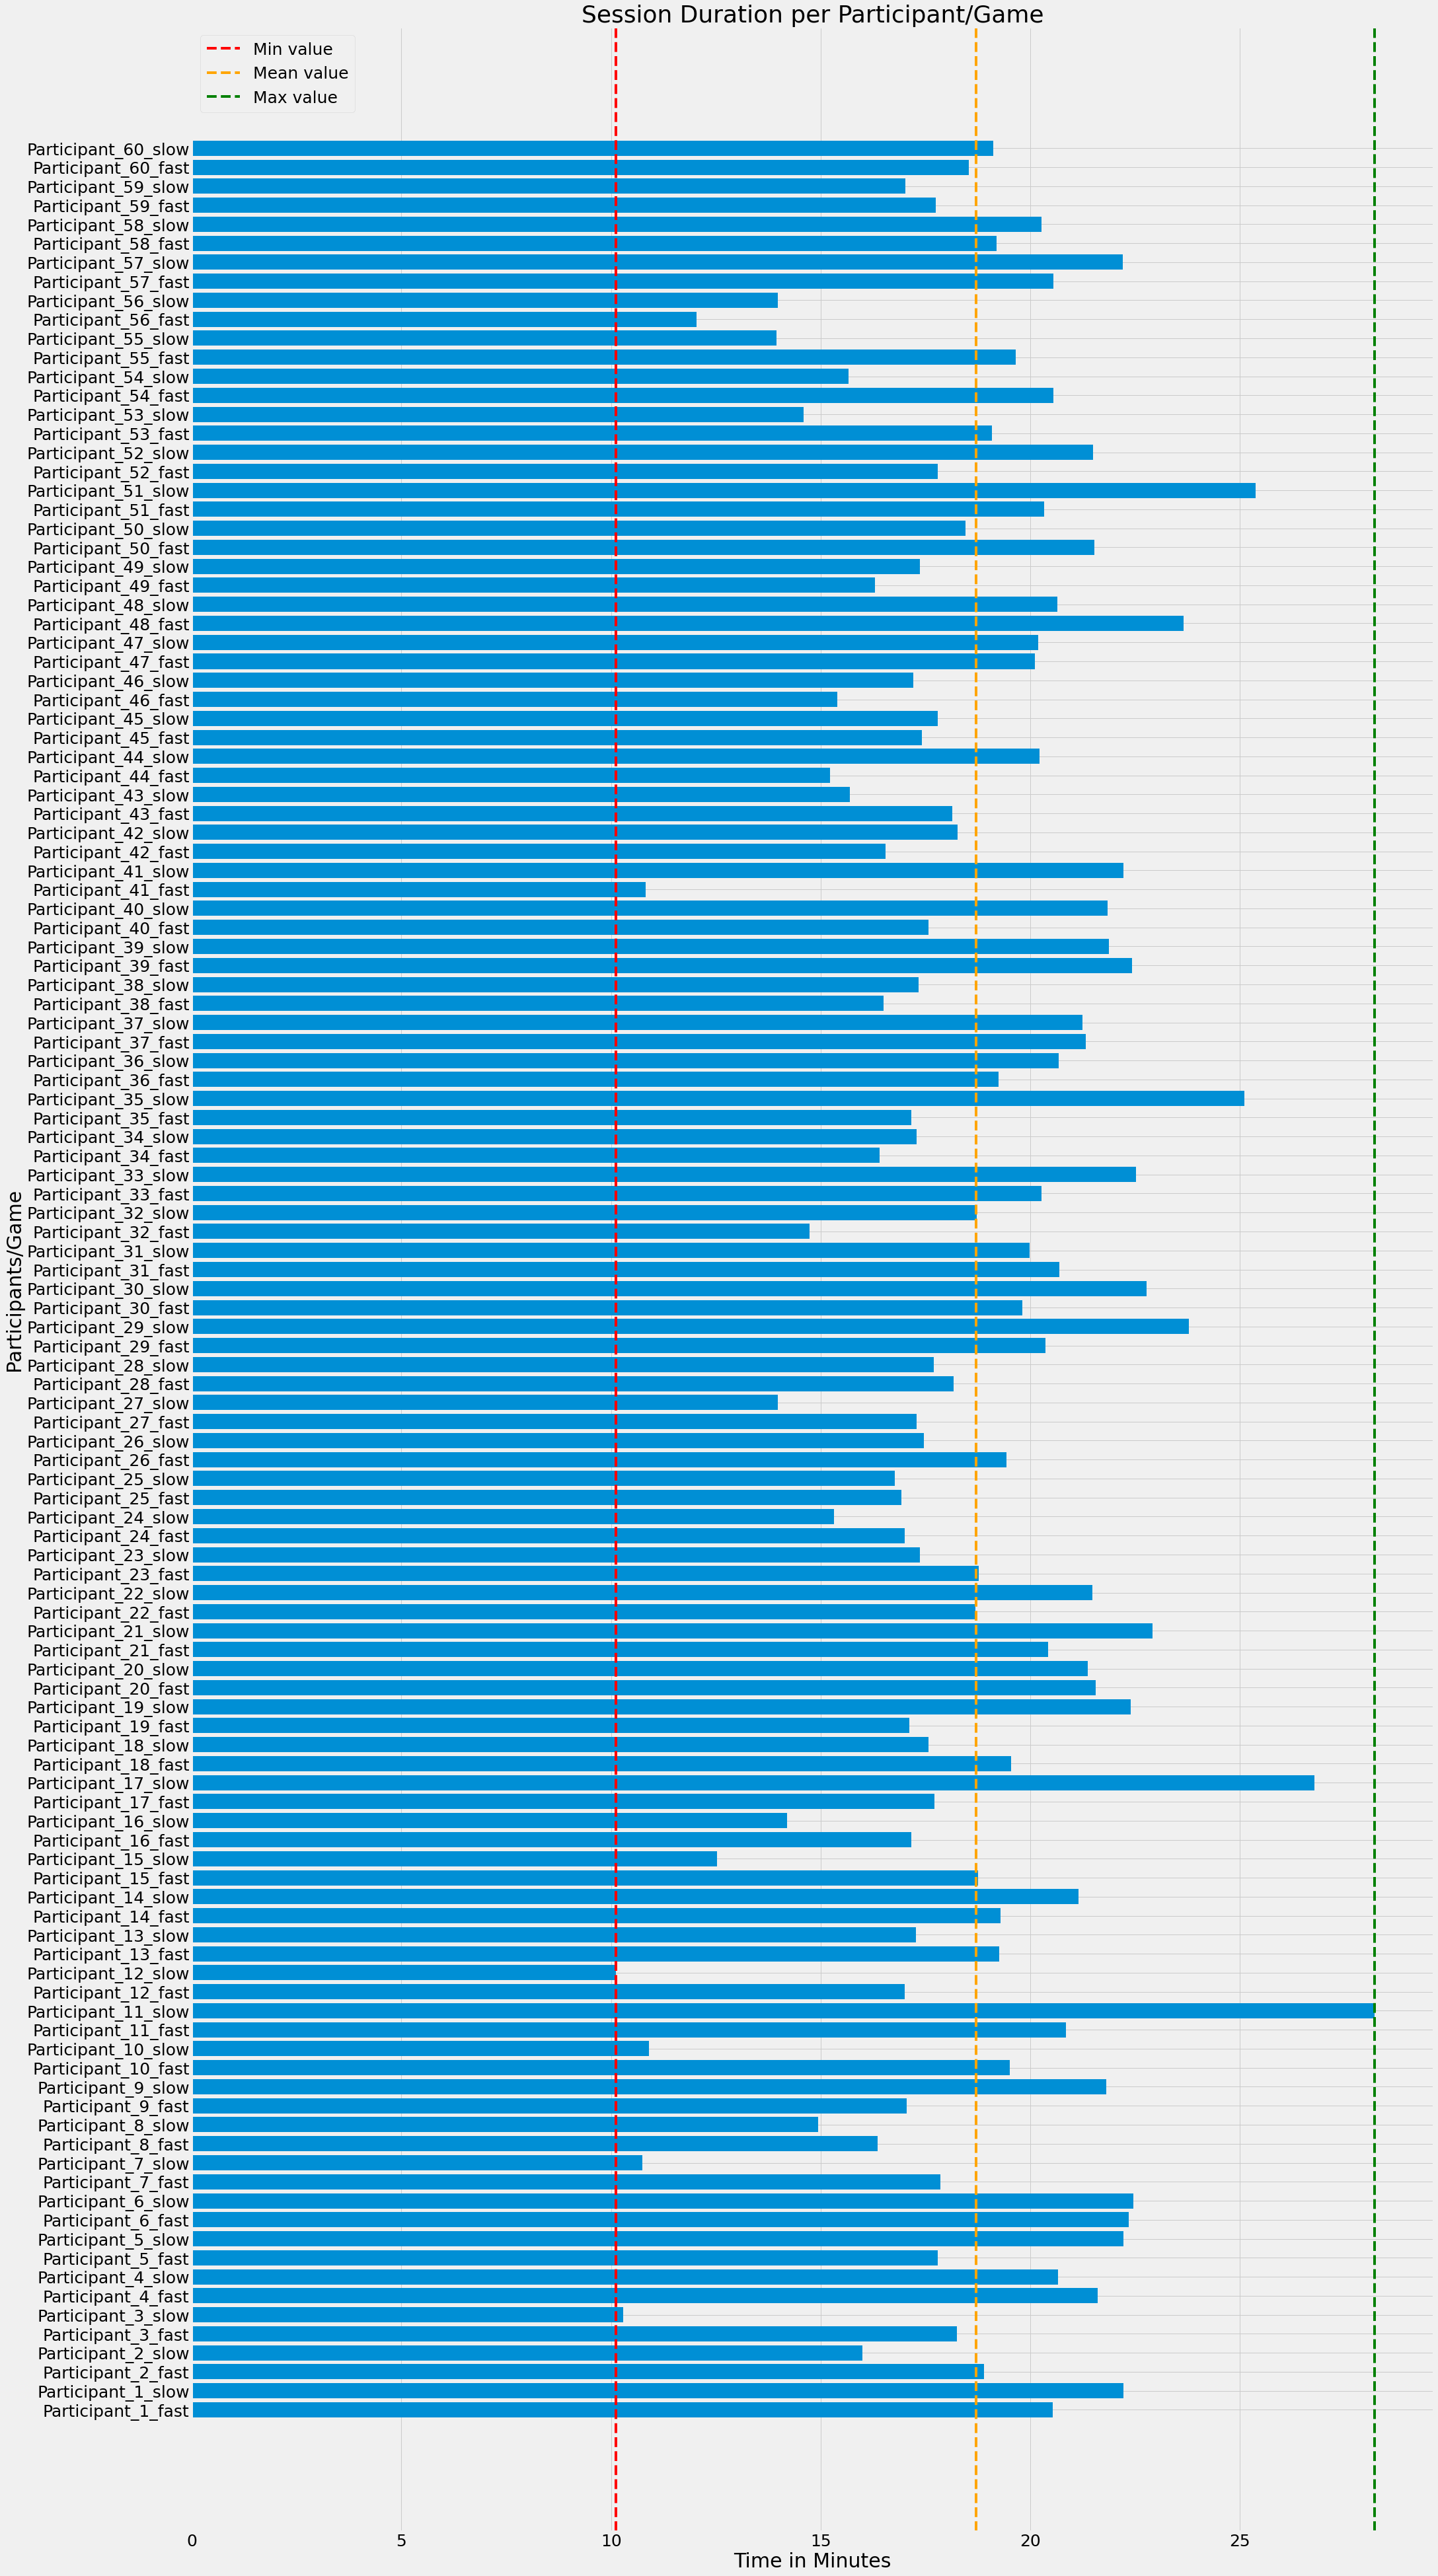

In [13]:
data_in_minutes = {k: v / 60 for k, v in session.items()}
participants = list(data_in_minutes.keys())
times_in_minutes = list(data_in_minutes.values())

plt.figure(figsize=(30, 65))
plt.barh(participants, times_in_minutes)
min_time = min(times_in_minutes)
plt.axvline(min_time, color='red', linestyle='--', linewidth=4, label = 'Min value' )
mean_time = sum(times_in_minutes) / len(times_in_minutes)
plt.axvline(mean_time, color='orange', linestyle='--', linewidth=4, label = 'Mean value')
max_time = max(times_in_minutes)
plt.axvline(max_time, color='green', linestyle='--', linewidth=4, label = 'Max value')

plt.xlabel('Time in Minutes')
plt.ylabel('Participants/Game')
plt.title('Session Duration per Participant/Game')
plt.legend()

We have 60 participants, each of whom played two types of games: an advanced game (fast-paced) and a basic game (slow-paced). The session durations varied, with a minimum of 10 minutes, an average of 18 minutes, and a maximum of 28 minutes. This variation in session duration and the differing number of data samples per participant can lead to unbalanced data, potentially causing issues in our analysis.

To address this, we propose two solutions:

1. Downsample all sessions to the minimum duration of 10 minutes. The advantage of this approach is that it standardizes the session duration for all participants, ranging from 0 to 10 minutes. However, this method may result in significant data loss, as some participants could lose up to 18 minutes of their session data.

2. Sample an equal number of data points from each participant, matching the number of samples in the session with the shortest duration. This method is beneficial because it reduces the amount of information lost. However, it means that the sessions will no longer be aligned in terms of time duration, as each participant's session will be represented by a different time scale.